# User overview analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from scripts.missing_percentage import percent_missing
from scripts.missing_filler import Cleaner as Cleaner
from scripts.data_summry import Summery as summery
from scripts.outlier import *
from scripts.type_format import Format as formater
import scripts.fix_outlier as fix
import scripts.plot as plot
import scripts.fix_outlier as fix
import scripts.plot_multivar as mult_plot
import seaborn as sns

cleaner = Cleaner()
summery = summery()
formater=formater()
import os 
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#set path for files

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","telecom_clean_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

In [4]:
clean_data=pd.read_csv(data_path)

## Exploration of the data Handset type and Handset manufacture 

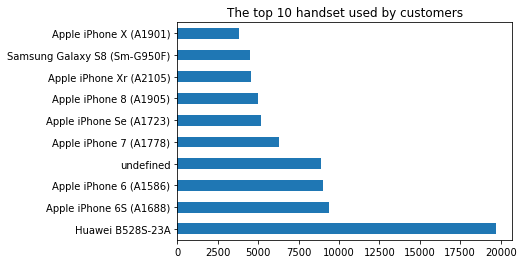

In [5]:
# Finding out the top 10 handset used by customers

handsets_df=clean_data['Handset Type'].value_counts()[:10].plot(kind='barh', title="The top 10 handset used by customers")

In [6]:
# finding top 3 handset manufacturer used by customers
Handset_manufacturer_df=clean_data['Handset Manufacturer'].value_counts()[:3]

In [7]:
Handset_manufacturer_df

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

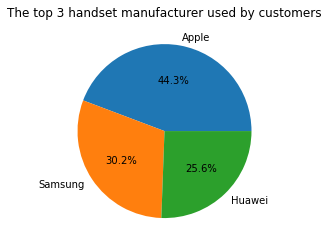

In [8]:
label = ["Apple", "Samsung", "Huawei"]


plt.pie(Handset_manufacturer_df, labels=label, autopct = '%1.1f%%')
plt.title("The top 3 handset manufacturer used by customers")
plt.show() 


<AxesSubplot:title={'center':'The top 5 handset for Apple company'}>

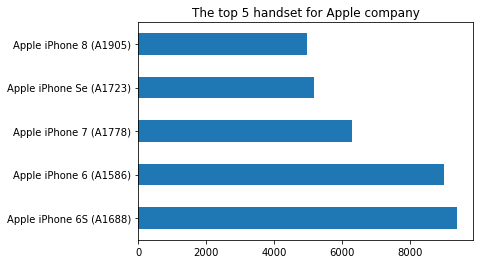

In [9]:
# Finding out top 5 handset for Apple company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Apple')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Apple company")



In [10]:
handset_manu_group.get_group('Apple')['Handset Type'].value_counts()[:5]

Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: Handset Type, dtype: int64

<AxesSubplot:title={'center':'The top 5 handset for Samsung company'}>

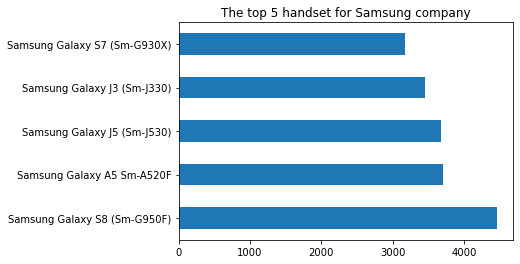

In [11]:
#the second one is sumsung
#finding out top 5 handset for Samsung company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Samsung')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Samsung company")



<AxesSubplot:title={'center':'The top 5 handset for Huawei company'}>

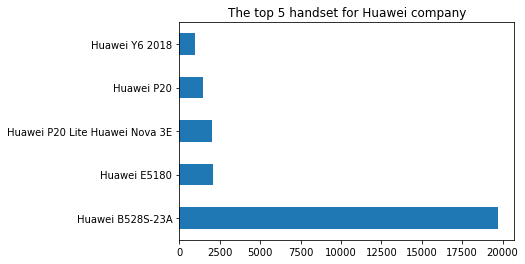

In [12]:
#the third one is Huawei
#finding out top 5 handset for Huawei company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Huawei')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Huawei company")



## Observation 

1.The most frequently used handset is Huawei B5285-23A about twice the second frequently used (Apple iPhone 6S) and  
the third frequently used handset (Apple iPhone 6).

2.Apple is the biggest Handset manufacturer, Samsung is the second.Huawei takes the third place.


# Data Aggregation per user

In [13]:
# to select the unique values for xDR sessions
summery.summ_columns(clean_data)

variables  missing_count  missing_percent_(%)  \
0                        Bearer Id              0                  0.0   
1                            Start              0                  0.0   
2                         Start ms              0                  0.0   
3                              End              0                  0.0   
4                           End ms              0                  0.0   
5                        Dur. (ms)              0                  0.0   
6                             IMSI              0                  0.0   
7                    MSISDN/Number              0                  0.0   
8                             IMEI              0                  0.0   
9               Last Location Name            160                  0.0   
10                 Avg RTT DL (ms)              0                  0.0   
11                 Avg RTT UL (ms)              0                  0.0   
12         Avg Bearer TP DL (kbps)              0                  0.0   
13         Avg Bearer TP UL (kbps)              0                  0.0   
14             DL TP < 50 Kbps (%)              0                  0.0   
15  50 Kbps < DL TP < 250 Kbps (%)              0                  0.0   
16   250 Kbps < DL TP < 1 Mbps (%)              0                  0.0   
17              DL TP > 1 Mbps (%)              0                  0.0   
18             UL TP < 10 Kbps (%)              0                  0.0   
19   10 Kbps < UL TP < 50 Kbps (%)              0                  0.0   
20  50 Kbps < UL TP < 300 Kbps (%)              0                  0.0   
21            UL TP > 300 Kbps (%)              0                  0.0   
22       Activity Duration DL (ms)              0                  0.0   
23       Activity Duration UL (ms)              0                  0.0   
24                     Dur. (ms).1              0                  0.0   
25            Handset Manufacturer              0                  0.0   
26                    Handset Type              0                  0.0   
27   Nb of sec with Vol DL < 6250B              0                  0.0   
28   Nb of sec with Vol UL < 1250B              0                  0.0   
29         Social Media DL (Bytes)              0                  0.0   
30         Social Media UL (Bytes)              0                  0.0   
31               Google DL (Bytes)              0                  0.0   
32               Google UL (Bytes)              0                  0.0   
33                Email DL (Bytes)              0                  0.0   
34                Email UL (Bytes)              0                  0.0   
35              Youtube DL (Bytes)              0                  0.0   
36              Youtube UL (Bytes)              0                  0.0   
37              Netflix DL (Bytes)              0                  0.0   
38              Netflix UL (Bytes)              0                  0.0   
39               Gaming DL (Bytes)              0                  0.0   
40               Gaming UL (Bytes)              0                  0.0   
41                Other DL (Bytes)              0                  0.0   
42                Other UL (Bytes)              0                  0.0   
43                Total UL (Bytes)              0                  0.0   
44                Total DL (Bytes)              0                  0.0   

   data_type  unique_values  
0    float64              9  
1     object           9988  
2    float64           1000  
3     object           6401  
4    float64           1000  
5    float64          88816  
6    float64              7  
7    float64         106471  
8    float64           3843  
9     object          44869  
10   float64           2052  
11   float64            718  
12   float64          41374  
13   float64          14477  
14   float64            100  
15   float64             83  
16   float64             73  
17   float64             85  
18   float64             98  
19   float64        

In [14]:
list(clean_data.columns.values)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [15]:
#taking "MSISDN/Number" as a user

clean_data['Total_transmit'] = clean_data['Total UL (Bytes)'] + clean_data['Total DL (Bytes)']
clean_data['Other_transmit'] = clean_data['Other UL (Bytes)'] + clean_data['Other DL (Bytes)']
clean_data['AVG RTT (S)']=clean_data['Avg RTT DL (ms)']+clean_data['Avg RTT UL (ms)']
clean_data['AVG Bearer TP']=clean_data['Avg Bearer TP DL (kbps)']+clean_data['Avg Bearer TP UL (kbps)']
clean_data['sec with vol<6.25kb']=clean_data['Nb of sec with Vol DL < 6250B']+clean_data['Nb of sec with Vol UL < 1250B']
clean_data['Gaming'] = clean_data['Gaming UL (Bytes)'] + clean_data['Gaming DL (Bytes)']
clean_data['Netflix'] = clean_data['Netflix UL (Bytes)'] + clean_data['Netflix DL (Bytes)']
clean_data['Youtube'] = clean_data['Youtube UL (Bytes)'] + clean_data['Youtube DL (Bytes)']
clean_data['Email'] = clean_data['Email UL (Bytes)'] + clean_data['Email DL (Bytes)']
clean_data['Google'] = clean_data['Google UL (Bytes)'] + clean_data['Google DL (Bytes)']
clean_data['Social Media'] = clean_data['Social Media UL (Bytes)'] + clean_data['Social Media DL (Bytes)']
clean_data.head()



Bearer Id                Start  Start ms                  End  End ms  \
0  1.311450e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311450e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311450e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   652.0   
3  1.311450e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311450e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Other_transmit  AVG RTT (S)  AVG Bearer TP  sec with vol<6.25kb  \
0  ...     180558843.0         47.0           67.0                427.0   
1  ...     541959383.0         70.0           42.0               1993.0   
2  ...     414908351.0         50.0           15.0               1446.0   
3  ...     761837216.0         50.0           88.0                224.0   
4  ...     564619822.0         50.0           15.0               1211.0   

        Gaming     Netflix     Youtube      Email      Google  Social Media  
0  292426453.0  17855187.0  18355943.0  3701304.0   2905912.0     1570185.0  
1  609920783.0  35565545.0  39359124.0   937385.0   4414096.0     1933278.0  
2  229980251.0  23751202.0  34425237.0  3363124.0  10229119.0     1726277.0  
3  810387875.0  15092588.0  36534765.0  2070983.0  11811761.0      657493.0  
4  531237049.0  17539799.0  34222253.0  2110349.0   7748843.0      912788.0  

[5 rows x 56 columns]

In [16]:
# Creating new relevant columns

new_rel_column = ['Bearer Id','Dur. (ms)','Handset Type','MSISDN/Number','AVG RTT (S)', 'AVG Bearer TP', 'sec with vol<6.25kb','Total_transmit','Other_transmit','Gaming','Netflix','Youtube','Email','Google','Social Media']
user_data_overview = clean_data[new_rel_column]
user_data_overview.head()
    

Bearer Id  Dur. (ms)                 Handset Type  MSISDN/Number  \
0  1.311450e+19  1823652.0   Samsung Galaxy A5 Sm-A520F   3.366496e+10   
1  1.311450e+19  1365104.0  Samsung Galaxy J5 (Sm-J530)   3.368185e+10   
2  1.311450e+19  1361762.0     Samsung Galaxy A8 (2018)   3.376063e+10   
3  1.311450e+19  1321509.0                    undefined   3.375034e+10   
4  1.311450e+19  1089009.0             Samsung Sm-G390F   3.369980e+10   

   AVG RTT (S)  AVG Bearer TP  sec with vol<6.25kb  Total_transmit  \
0         47.0           67.0                427.0     345629377.0   
1         70.0           42.0               1993.0     707185356.0   
2         50.0           15.0               1446.0     307690973.0   
3         50.0           88.0                224.0     889352748.0   
4         50.0           15.0               1211.0     607681403.0   

   Other_transmit       Gaming     Netflix     Youtube      Email      Google  \
0     180558843.0  292426453.0  17855187.0  18355943.0  3701304.0   2905912.0   
1     541959383.0  609920783.0  35565545.0  39359124.0   937385.0   4414096.0   
2     414908351.0  229980251.0  23751202.0  34425237.0  3363124.0  10229119.0   
3     761837216.0  810387875.0  15092588.0  36534765.0  2070983.0  11811761.0   
4     564619822.0  531237049.0  17539799.0  34222253.0  2110349.0   7748843.0   

   Social Media  
0     1570185.0  
1     1933278.0  
2     1726277.0  
3      657493.0  
4      912788.0

In [17]:

# Converting Bytes to MB.
user_data_overview=formater.byte_to_mb(user_data_overview, "(Bytes)")
# Converting ms to s

user_data_overview=formater.ms_to_s(user_data_overview, "(ms)")
summery.summ_columns(user_data_overview)

variables  missing_count  missing_percent_(%) data_type  \
0             Bearer Id              0                  0.0   float64   
1              Dur. (S)              0                  0.0   float64   
2          Handset Type              0                  0.0    object   
3         MSISDN/Number              0                  0.0   float64   
4           AVG RTT (S)              0                  0.0   float64   
5         AVG Bearer TP              0                  0.0   float64   
6   sec with vol<6.25kb              0                  0.0   float64   
7        Total_transmit              0                  0.0   float64   
8        Other_transmit              0                  0.0   float64   
9                Gaming              0                  0.0   float64   
10              Netflix              0                  0.0   float64   
11              Youtube              0                  0.0   float64   
12                Email              0                  0.0   float64   
13               Google              0                  0.0   float64   
14         Social Media              0                  0.0   float64   

    unique_values  
0               9  
1           88816  
2            1391  
3          106471  
4            2184  
5           43320  
6           30794  
7          148493  
8          148489  
9          148496  
10         148193  
11         148163  
12         145758  
13         147658  
14         145490

In [52]:
#Aggregate per user the following information in the column  

"""
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application.
"""
        
aggr_list = {'Bearer Id': 'count','Dur. (S)': 'sum','Handset Type': pd.Series.mode,
            'AVG RTT (S)':'sum', 'AVG Bearer TP': 'sum', 'sec with vol<6.25kb': 'sum',
            'Total_transmit': 'sum','Other_transmit': 'sum','Gaming': 'sum','Netflix': 'sum',
            'Youtube': 'sum', 'Email': 'sum','Google': 'sum','Social Media': 'sum'}

user_dataagg_overview=user_data_overview.groupby('MSISDN/Number').aggregate(aggr_list)
user_dataagg_overview['Num_of_xDR_sessions']=user_dataagg_overview['Bearer Id']
user_dataagg_overview['session_duration']=user_dataagg_overview['Dur. (S)']
new_aggr_column = ['Num_of_xDR_sessions','session_duration','Handset Type','AVG RTT (S)', 'AVG Bearer TP', 'sec with vol<6.25kb','Total_transmit','Other_transmit','Gaming','Netflix','Youtube','Email','Google','Social Media']

agg_user_data_overview=user_dataagg_overview[new_aggr_column]
agg_user_data_overview.reset_index(drop=False, inplace=True)

In [53]:
agg_user_data_overview

MSISDN/Number  Num_of_xDR_sessions  session_duration  \
0          33601001722.000                    1           116.720   
1          33601001754.000                    1           181.230   
2          33601002511.000                    1           134.969   
3          33601007832.000                    1            49.878   
4          33601008617.000                    2            37.104   
...                    ...                  ...               ...   
106466     33789996170.000                    1             8.810   
106467     33789997247.000                    1           140.988   
106468   3197020000000.000                    1           877.385   
106469 337000000000000.000                    1           253.030   
106470 882397000000000.000                    1           869.844   

                            Handset Type  AVG RTT (S)  AVG Bearer TP  \
0         Huawei P20 Lite Huawei Nova 3E       46.000         76.000   
1                 Apple iPhone 7 (A1778)       31.000         99.000   
2                              undefined       50.000         97.000   
3                Apple iPhone 5S (A1457)       84.000        248.000   
4                Apple iPhone Se (A1723)      119.000      56844.000   
...                                  ...          ...            ...   
106466               Huawei Honor 9 Lite       52.000      10365.000   
106467       Apple iPhone 8 Plus (A1897)       40.000        116.000   
106468  Quectel Wireless. Quectel Ec25-E       50.000          1.000   
106469                  Huawei B525S-23A       50.000         33.000   
106470  Quectel Wireless. Quectel Ec21-E       50.000          2.000   

        sec with vol<6.25kb  Total_transmit  Other_transmit         Gaming  \
0                   153.000   878690574.000   386570872.000  812458661.000   
1                   469.000   156859643.000   281710071.000  119750078.000   
2                   183.000   595966483.000   501693672.000  538827713.000   
3                   211.000   422320698.000    35279702.000  391126127.000   
4                 10974.000  1457410944.000   804804484.000 1314797820.000   
...                     ...             ...             ...            ...   
106466             1286.000   714641641.000   295282817.000  660361359.000   
106467              380.000   480307335.000   211115113.000  437003292.000   
106468              217.000   232123971.000   470526473.000  178048738.000   
106469              950.000   596287824.000   149188439.000  510142695.000   
106470              217.000   139153646.000   401360457.000   43070260.000   

            Netflix      Youtube       Email       Google  Social Media  
0      27180981.000 21624548.000 1331362.000  4389005.000   2232135.000  
1      11221763.000 12432223.000 3307781.000  5334863.000   2660565.000  
2      19353900.000 21333570.000 3205380.000  3443126.000   3195623.000  
3       1942092.000  6977321.000 2284670.000  9678493.000    280294.000  
4      49201724.000 41533002.000 3305469.000 18499616.000   2912542.000  
...             ...          ...         ...          ...           ...  
106466 14902538.000 26647843.000 1006915.000  7531269.000    300183.000  
106467  8531060.000 19851572.000 2514097.000  5429705.000    498569.000  
106468 26592300.000 11959905.000 1520771.000 10438660.000    715224.000  
106469 30905042.000 36734940.000 3318582.000  9830617.000    521566.000  
106470 28846230.000 40940710.000 3330974.000  9218647.000   1546088.000  

[106471 rows x 15 columns]

In [54]:
save_data_path = os.path.join(parent_dir,"data","session_data.csv") 
agg_user_data_overview.to_csv(save_data_path, index=False)


In [55]:
agg_user_data_overview.shape

(106471, 15)

# non-graphical Univariate Analysis

In [56]:
agg_user_data_overview.describe()

MSISDN/Number  Num_of_xDR_sessions  session_duration  AVG RTT (S)  \
count          106471.000           106471.000        106471.000   106471.000   
mean      45156113529.468                1.395           146.571      153.555   
std     2894642424460.304                0.807           186.563      662.593   
min       33601001722.000                1.000             7.142        0.000   
25%       33650879803.500                1.000            72.399       47.000   
50%       33663653890.000                1.000           103.137       60.000   
75%       33683450105.500                2.000           172.799      116.000   
max   882397000000000.000               18.000         18553.754    96924.000   

       AVG Bearer TP  sec with vol<6.25kb  Total_transmit  Other_transmit  \
count     106471.000           106471.000      106471.000      106471.000   
mean       21003.101            10783.313   691519853.419   598949256.849   
std        42489.718            33461.352   491526652.868   449288975.897   
min            0.000                2.000    33249009.000      149045.000   
25%           97.000              244.000   358765225.000   285874681.000   
50%          291.000              593.000   618326893.000   540109665.000   
75%        26529.500             5397.000   857873157.500   775646602.500   
max       902222.000          1208183.000  8846226494.000  8167877776.000   

              Gaming       Netflix       Youtube        Email        Google  \
count     106471.000    106471.000    106471.000   106471.000    106471.000   
mean   600258518.579  31563183.128  31581722.911  3151120.964  10890704.386   
std    449561110.905  21309392.942  21315507.210  2224562.522   7552384.397   
min       306358.000    184569.000     78903.000    18176.000     40330.000   
25%    288249263.000  18570109.000  18636632.500  1675398.000   5945631.500   
50%    542677264.000  26731157.000  26816330.000  2801129.000   9592577.000   
75%    777704466.500  38002332.000  37956655.000  3848998.000  13223179.500   
max   7749432234.000 399519079.000 452958769.000 42418782.000 152191852.000   

       Social Media  
count    106471.000  
mean    2549791.005  
std     1909684.872  
min        1563.000  
25%     1211936.000  
50%     2305229.000  
75%     3309043.000  
max    43374779.000

In [57]:
print(agg_user_data_overview.loc[:,'Total_transmit'].mean())
print(agg_user_data_overview.loc[:,'Other_transmit'].mean())

691519853.4188652
598949256.8494989


In [58]:
print(agg_user_data_overview.loc[:,'Total_transmit'].std())
print(agg_user_data_overview.loc[:,'Other_transmit'].std())

491526652.8678929
449288975.8973404


# graphical Univariate Analysis

<AxesSubplot:title={'center':'observing data volume share'}>

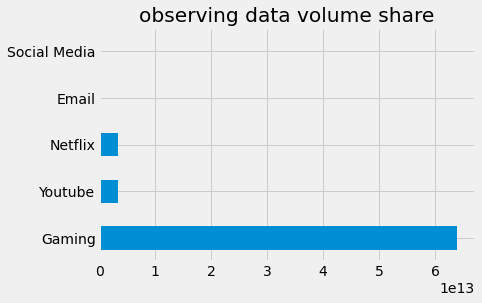

In [59]:
agg_user_data_overview[['Youtube','Gaming','Email','Netflix','Social Media']].sum().sort_values(ascending = False).plot(kind='barh', title="observing data volume share")


<AxesSubplot:title={'center':'comparing middle value'}>

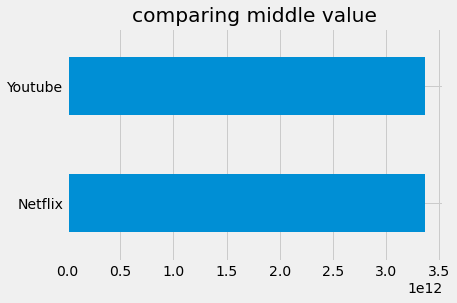

In [60]:
#compare the Youtube and Netflix
agg_user_data_overview[['Netflix','Youtube']].sum().plot(kind='barh', title='comparing middle value')


<AxesSubplot:title={'center':'comparing smallest value'}>

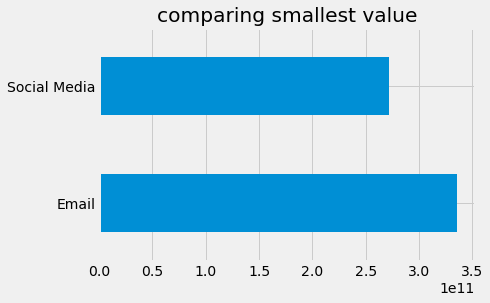

In [61]:
#compare the Email and Social
agg_user_data_overview[['Email','Social Media']].sum().plot(kind='barh', title='comparing smallest value')


## Observation

Univariant analysis using outlier

In [62]:
# Fixing the outliers in each column

agg_user_data_overview['session_duration']= fix.fix_outlier(agg_user_data_overview,'session_duration')
agg_user_data_overview['Total_transmit']= fix.fix_outlier(agg_user_data_overview,'Total_transmit')
agg_user_data_overview['Other_transmit']= fix.fix_outlier(agg_user_data_overview,'Other_transmit')
agg_user_data_overview['Gaming']= fix.fix_outlier(agg_user_data_overview,'Gaming')
agg_user_data_overview['Netflix']= fix.fix_outlier(agg_user_data_overview,'Netflix')
agg_user_data_overview['Youtube']= fix.fix_outlier(agg_user_data_overview,'Youtube')
agg_user_data_overview['Email']= fix.fix_outlier(agg_user_data_overview,'Email')
agg_user_data_overview['Google']= fix.fix_outlier(agg_user_data_overview,'Google')
agg_user_data_overview['Social Media']=fix.fix_outlier(agg_user_data_overview,'Social Media')

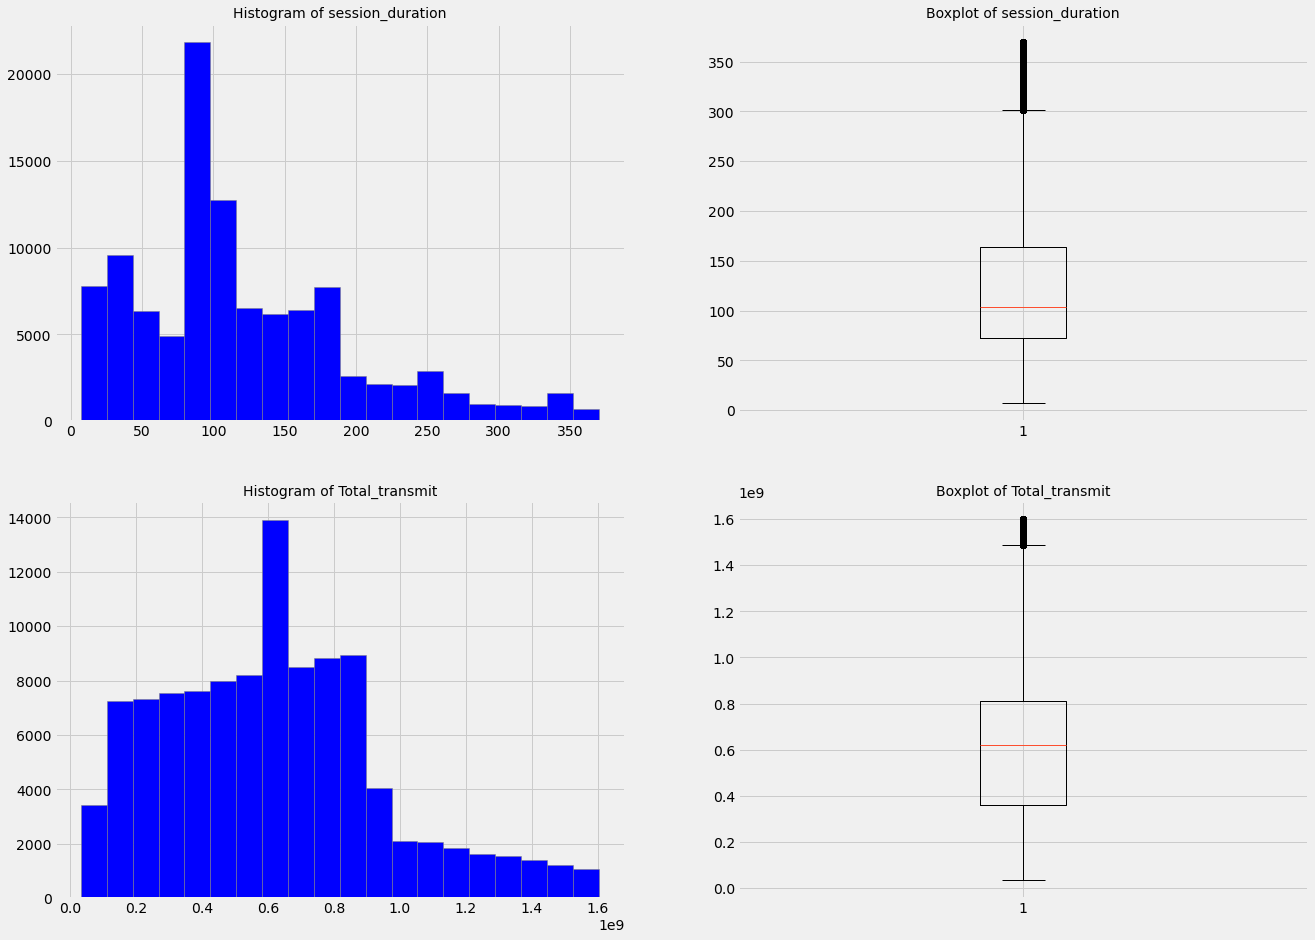

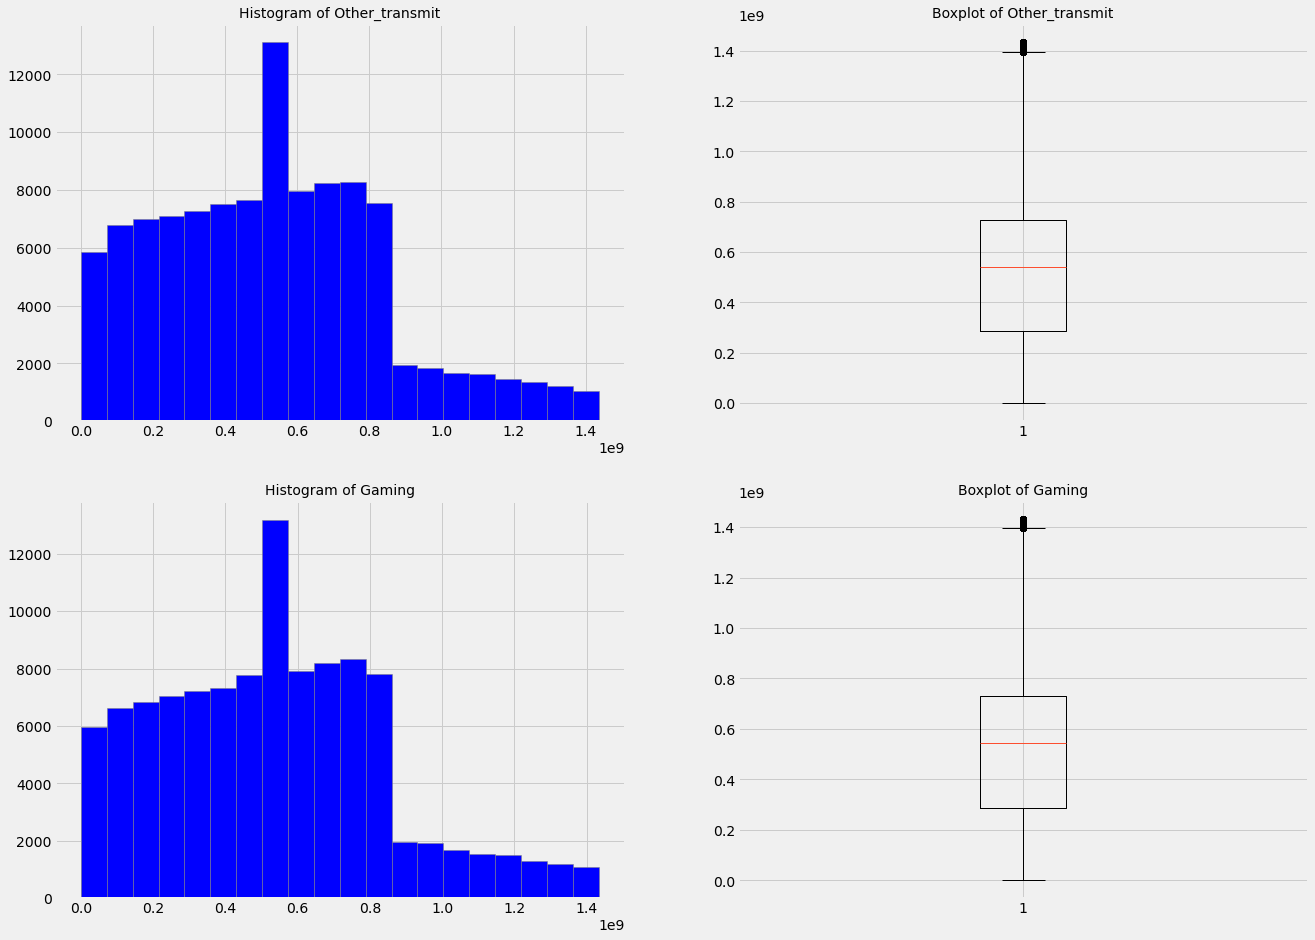

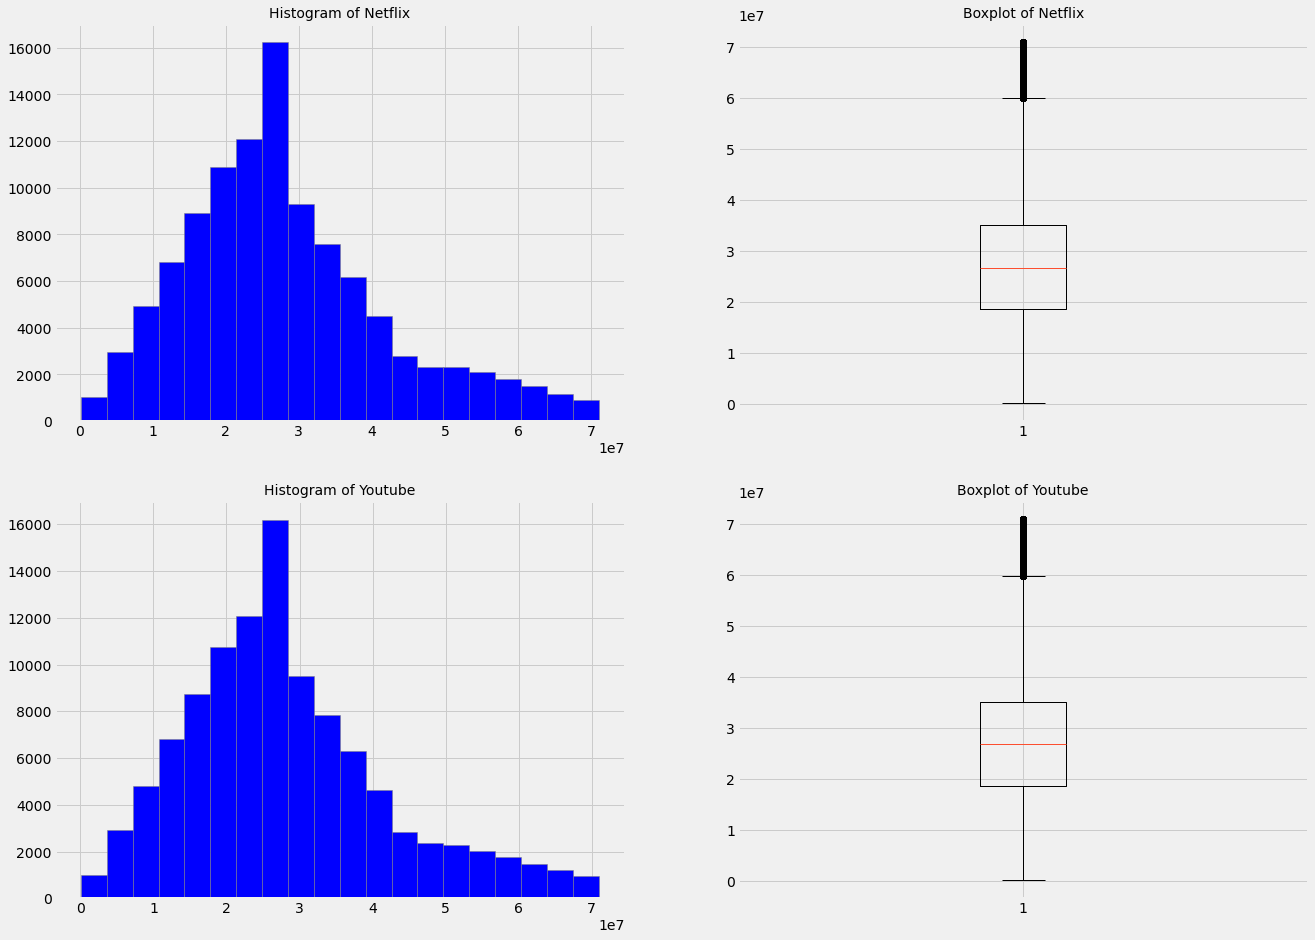

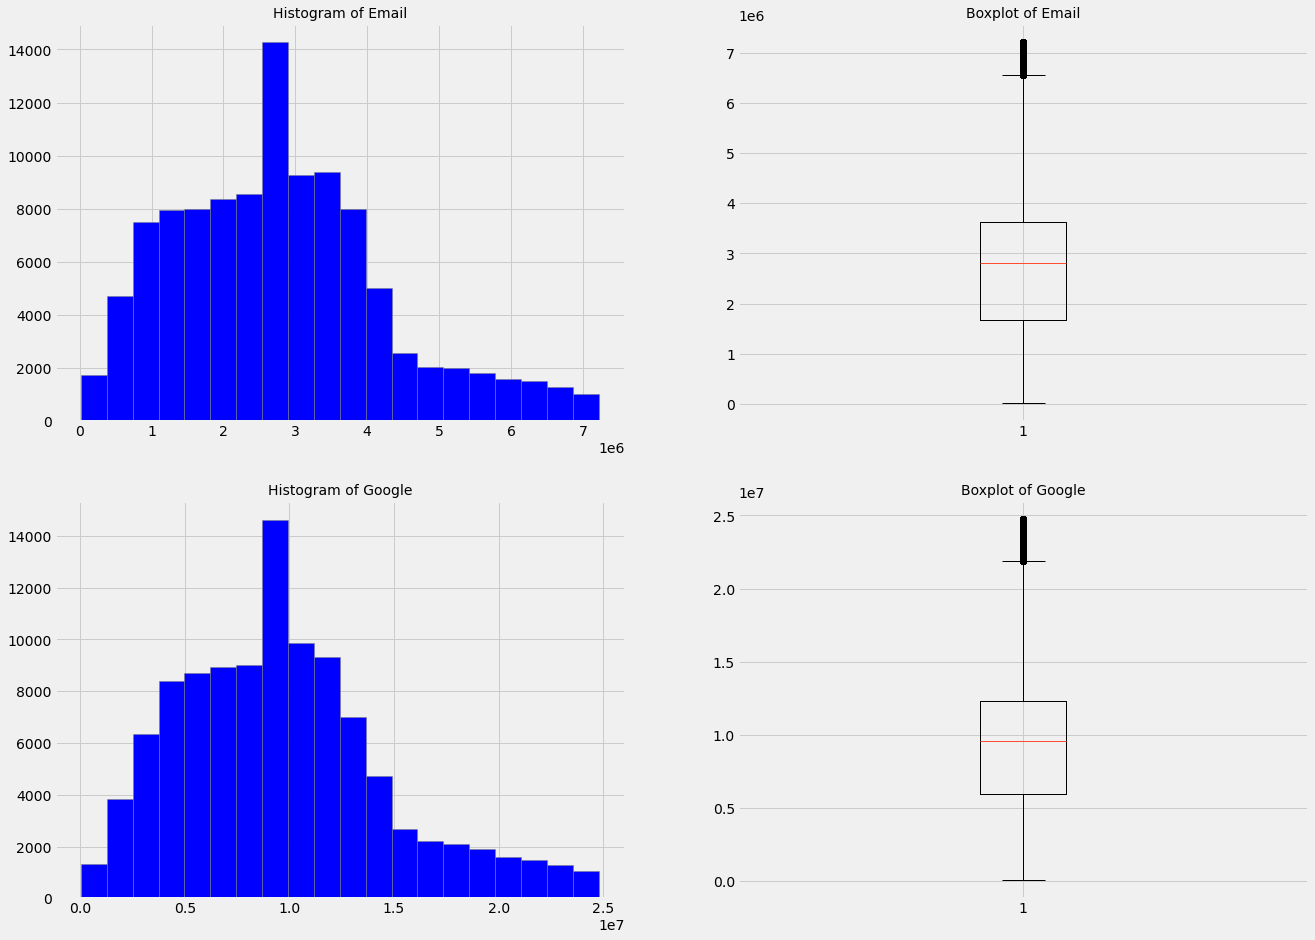

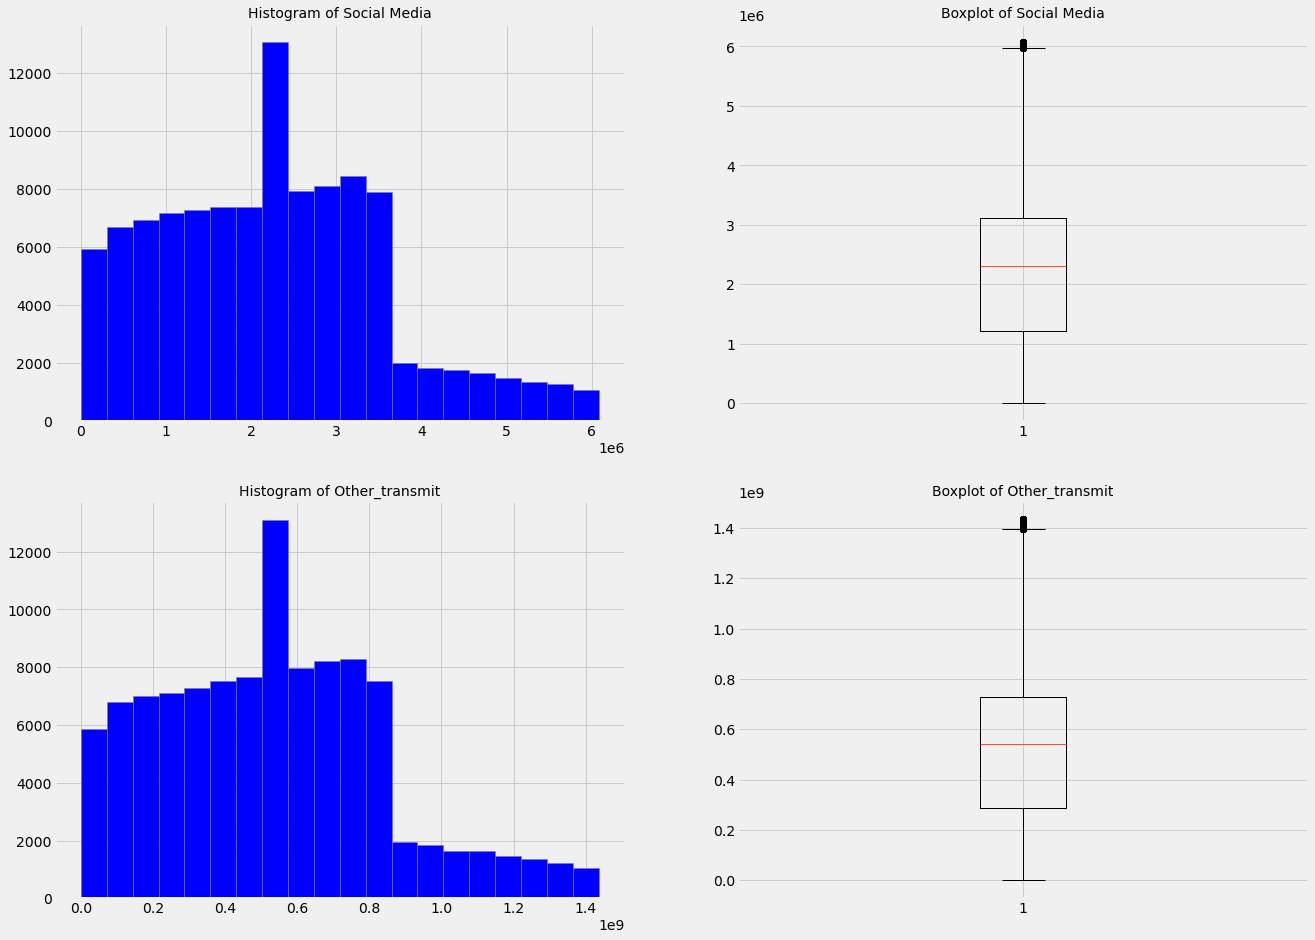

In [63]:
# Graphical univariate analysis plots after fixing outliers

plot.plot_univariate(agg_user_data_overview,'session_duration','Total_transmit')
plot.plot_univariate(agg_user_data_overview,'Other_transmit','Gaming')
plot.plot_univariate(agg_user_data_overview,'Netflix','Youtube')
plot.plot_univariate(agg_user_data_overview,'Email','Google')
plot.plot_univariate(agg_user_data_overview,'Social Media','Other_transmit')

# Bivaraint analysis

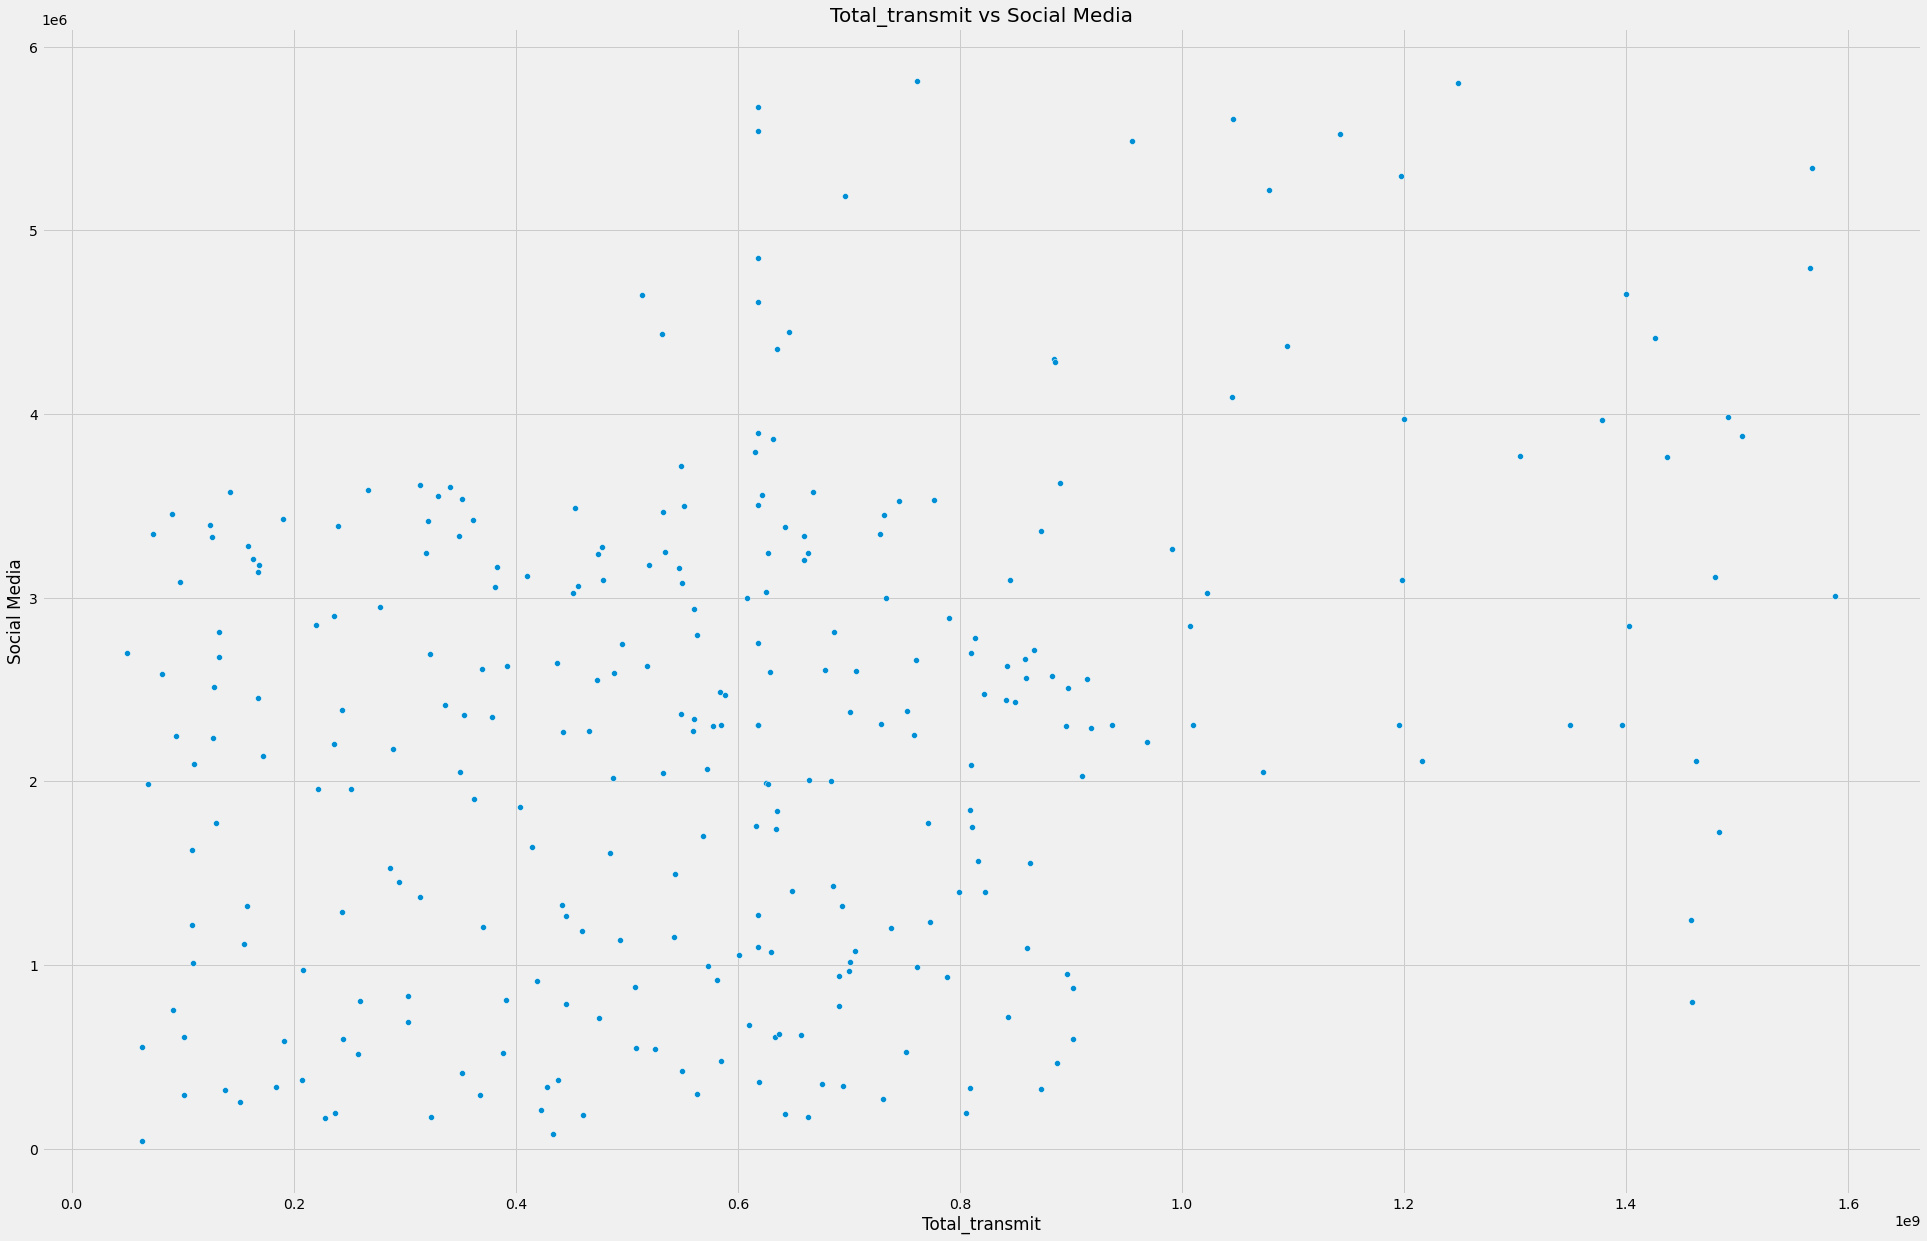

In [64]:
mult_plot.plot_scatter(agg_user_data_overview.sample(300), x_col="Total_transmit", y_col="Social Media", title="Total_transmit vs Social Media")


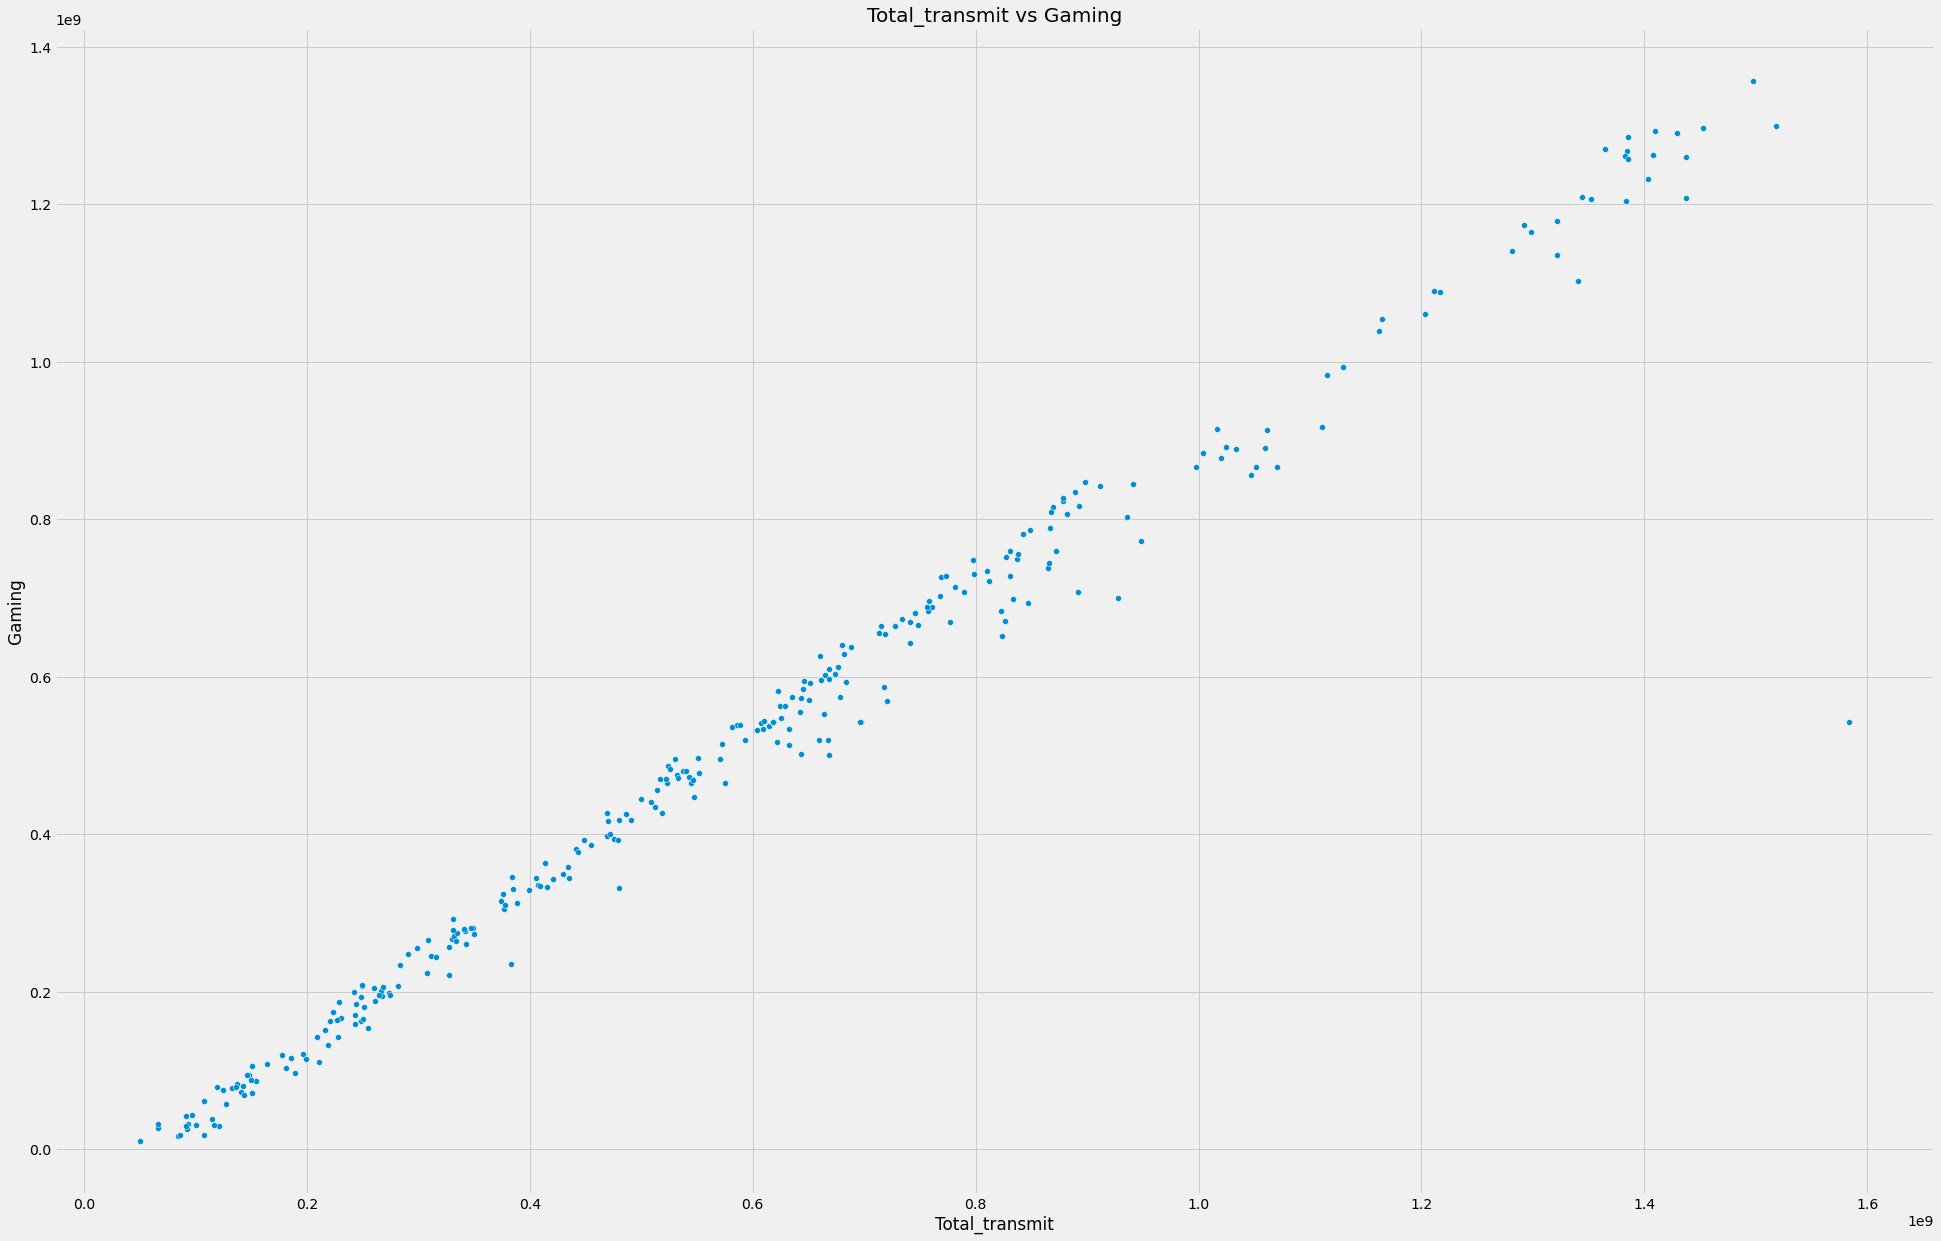

In [65]:
mult_plot.plot_scatter(agg_user_data_overview.sample(300), x_col="Total_transmit", y_col="Gaming", title="Total_transmit vs Gaming")


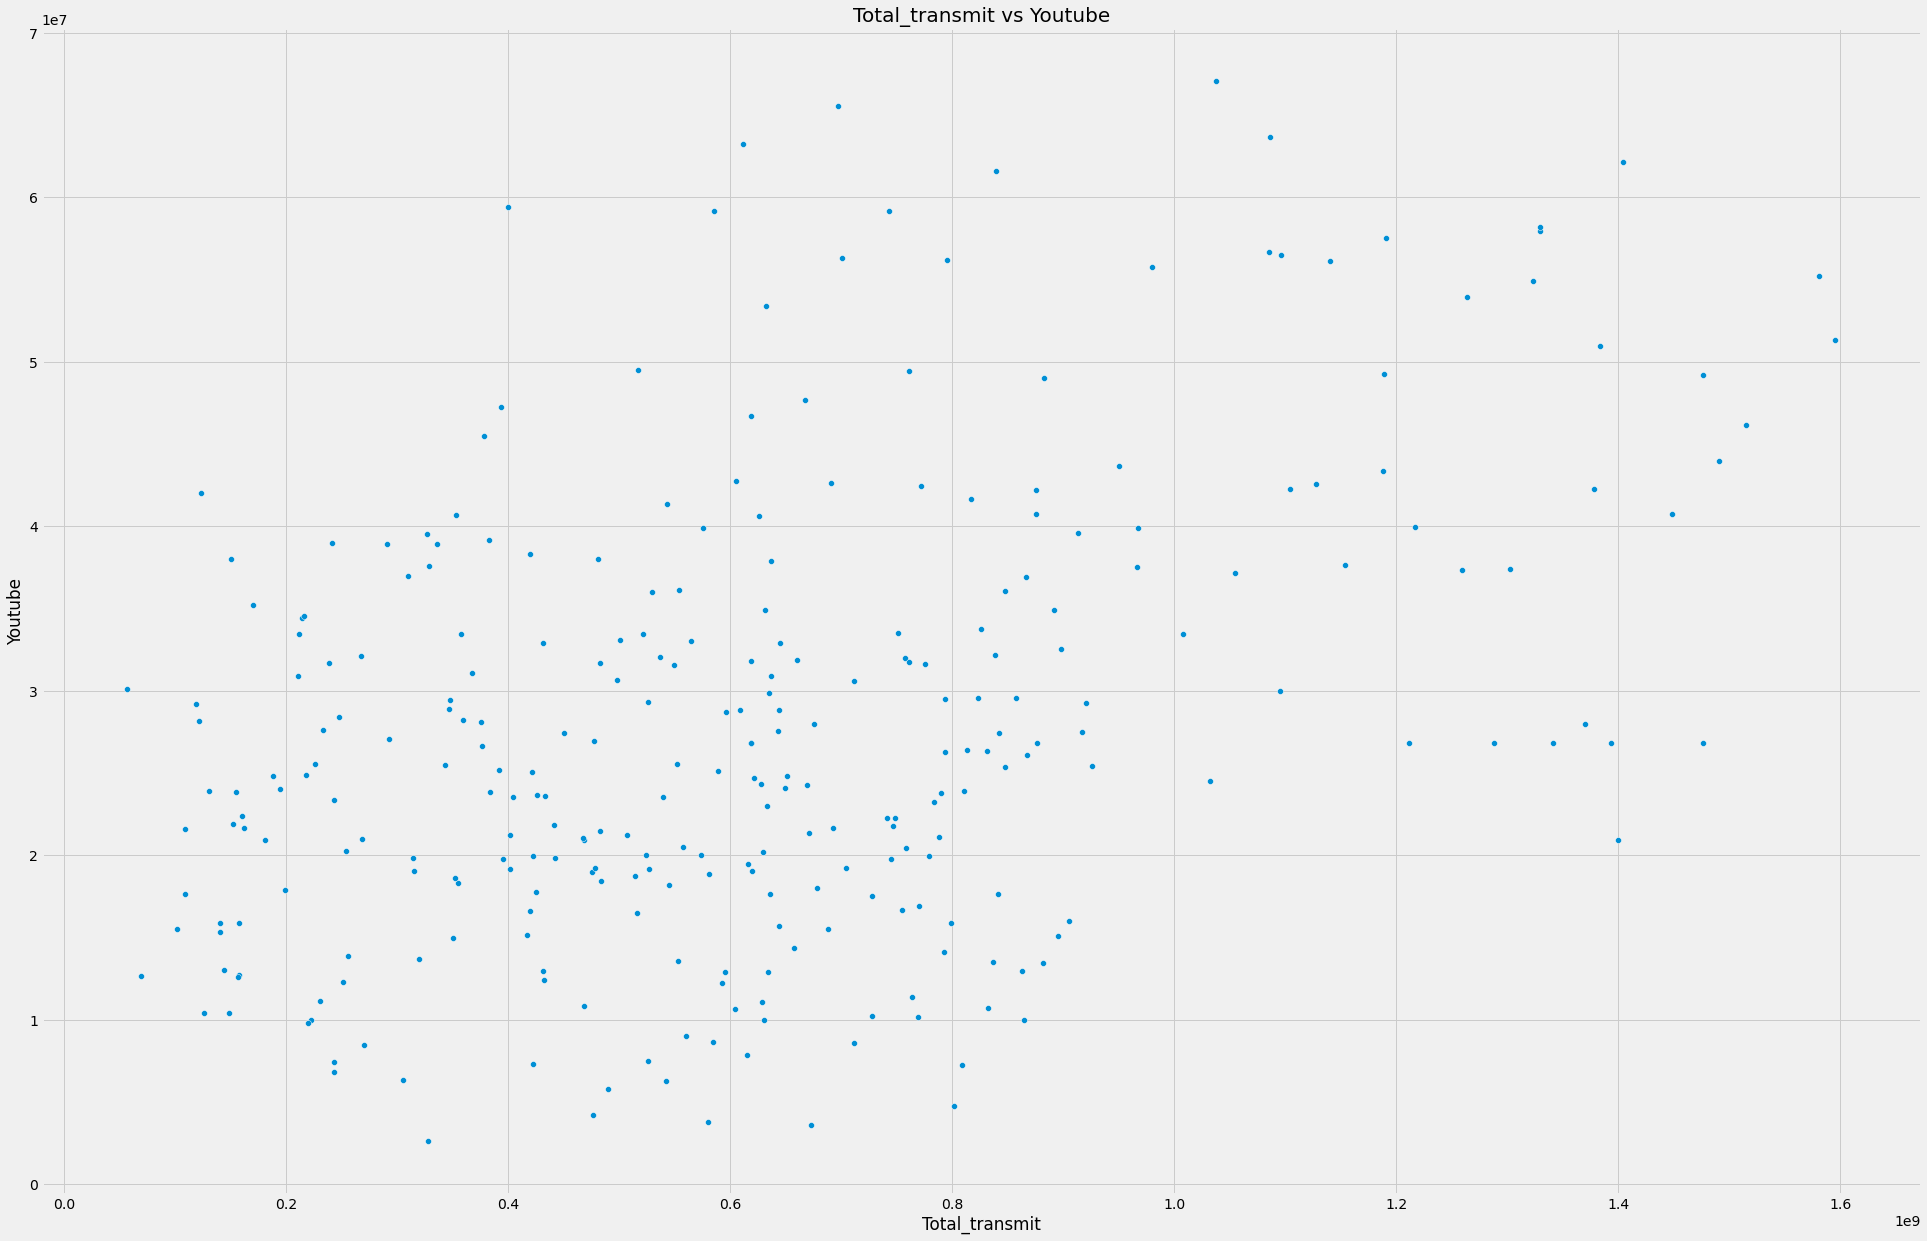

In [66]:
mult_plot.plot_scatter(agg_user_data_overview.sample(300), x_col="Total_transmit", y_col="Youtube", title="Total_transmit vs Youtube")


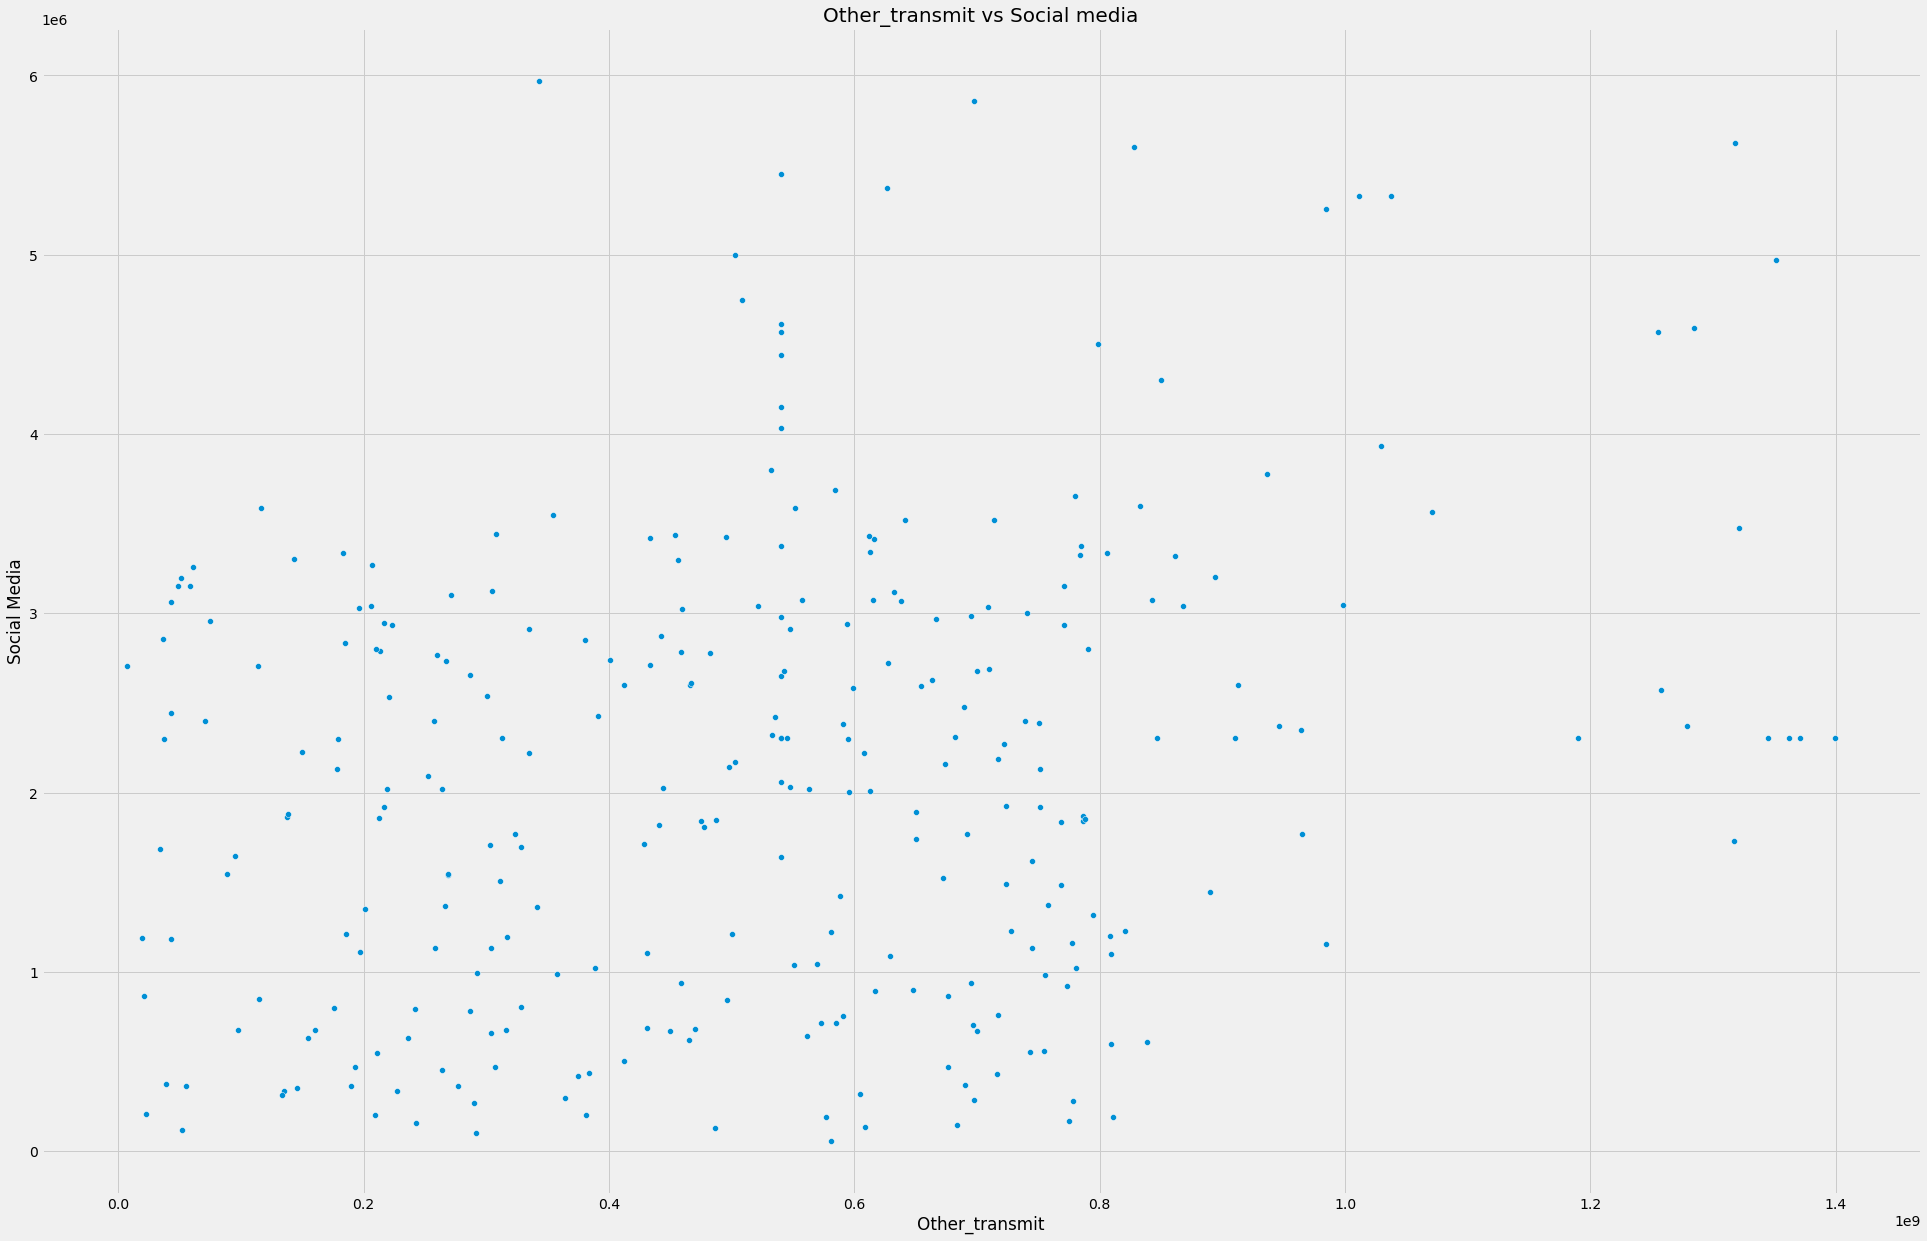

In [67]:
mult_plot.plot_scatter(agg_user_data_overview.sample(300), x_col="Other_transmit", y_col="Social Media", title="Other_transmit vs Social media")


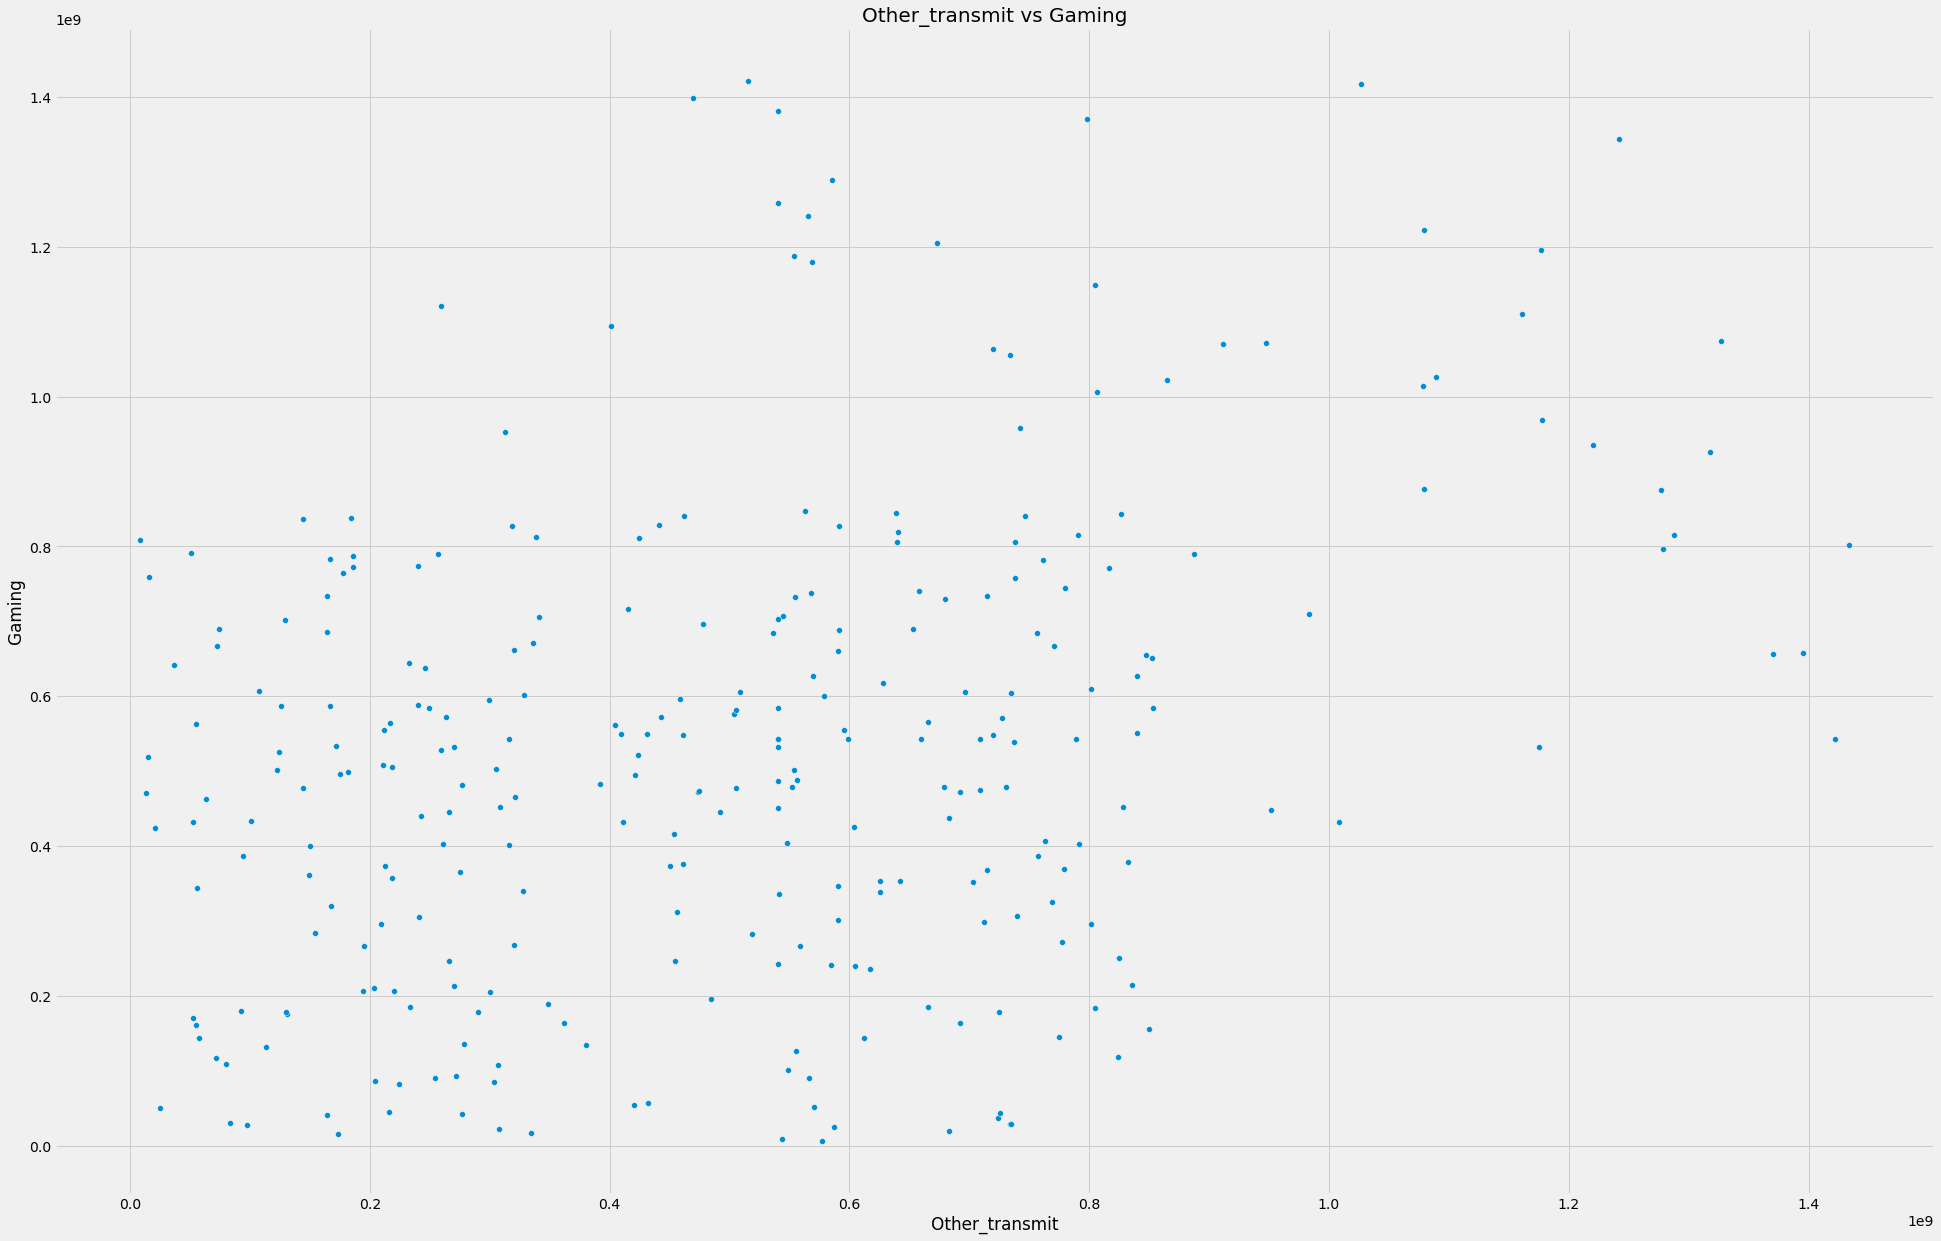

In [68]:
mult_plot.plot_scatter(agg_user_data_overview.sample(300), x_col="Other_transmit", y_col="Gaming", title="Other_transmit vs Gaming")


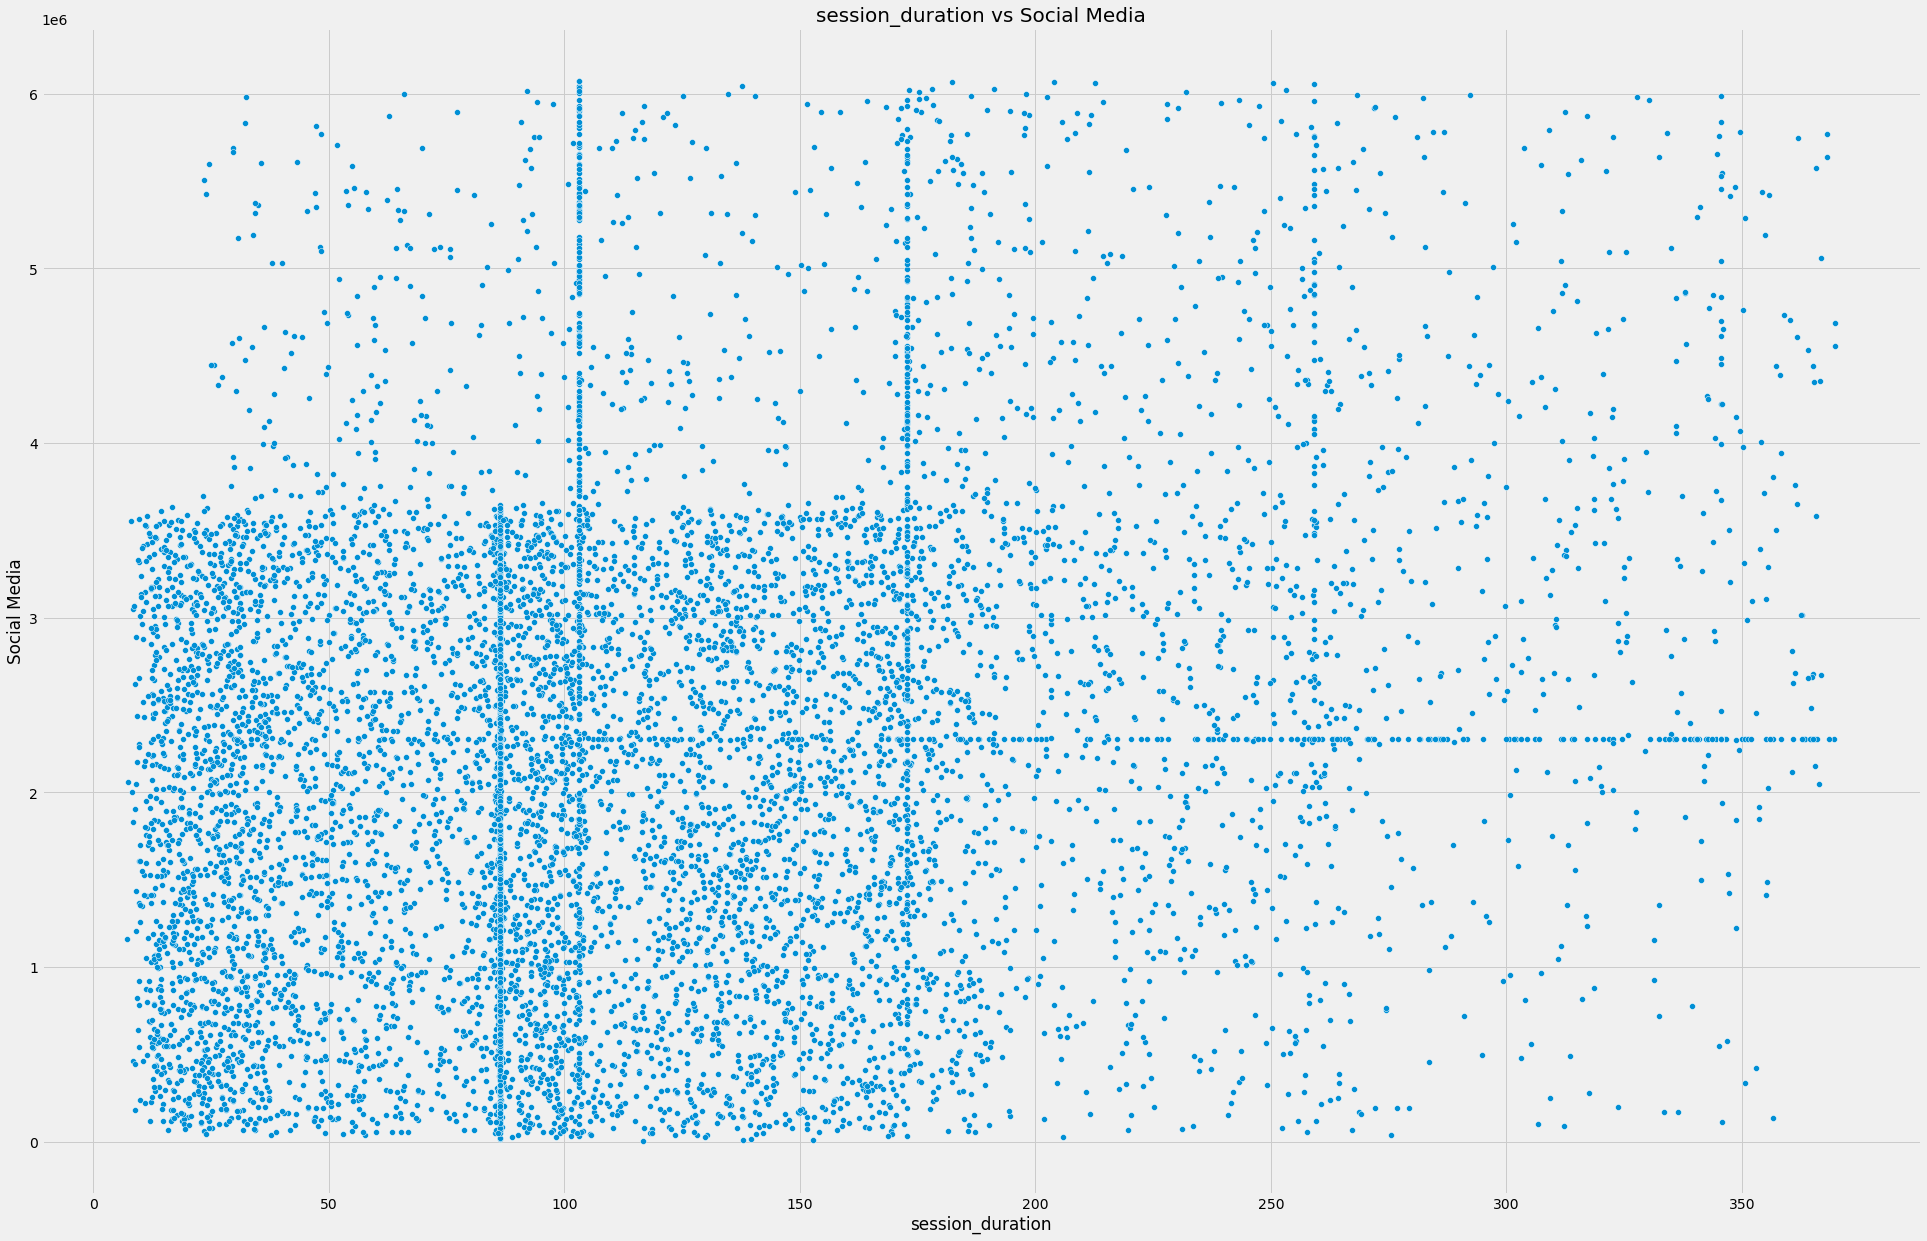

In [69]:
mult_plot.plot_scatter(agg_user_data_overview.sample(10000), x_col="session_duration", y_col="Social Media", title="session_duration vs Social Media")


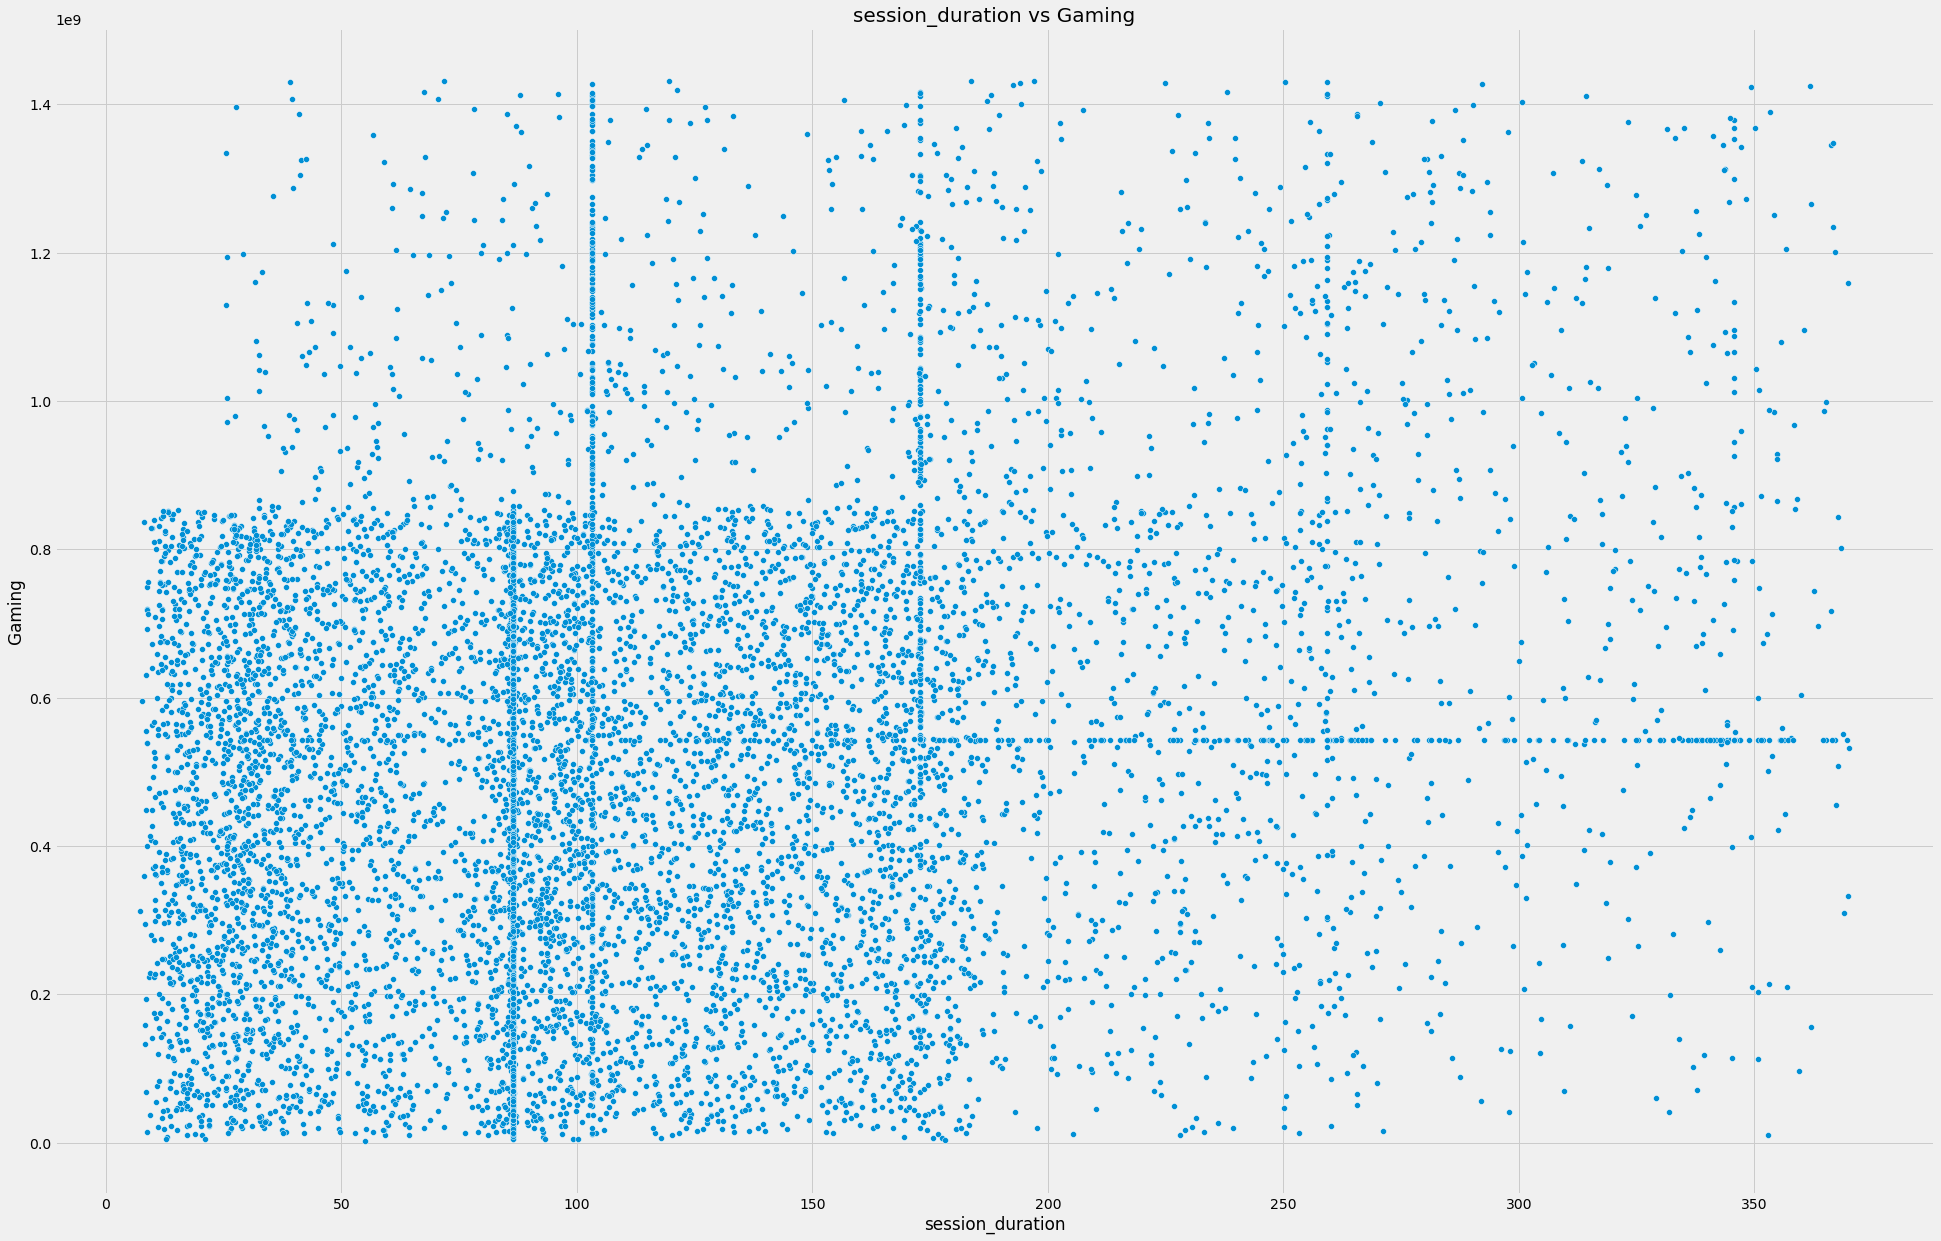

In [70]:
mult_plot.plot_scatter(agg_user_data_overview.sample(10000), x_col="session_duration", y_col="Gaming", title="session_duration vs Gaming")


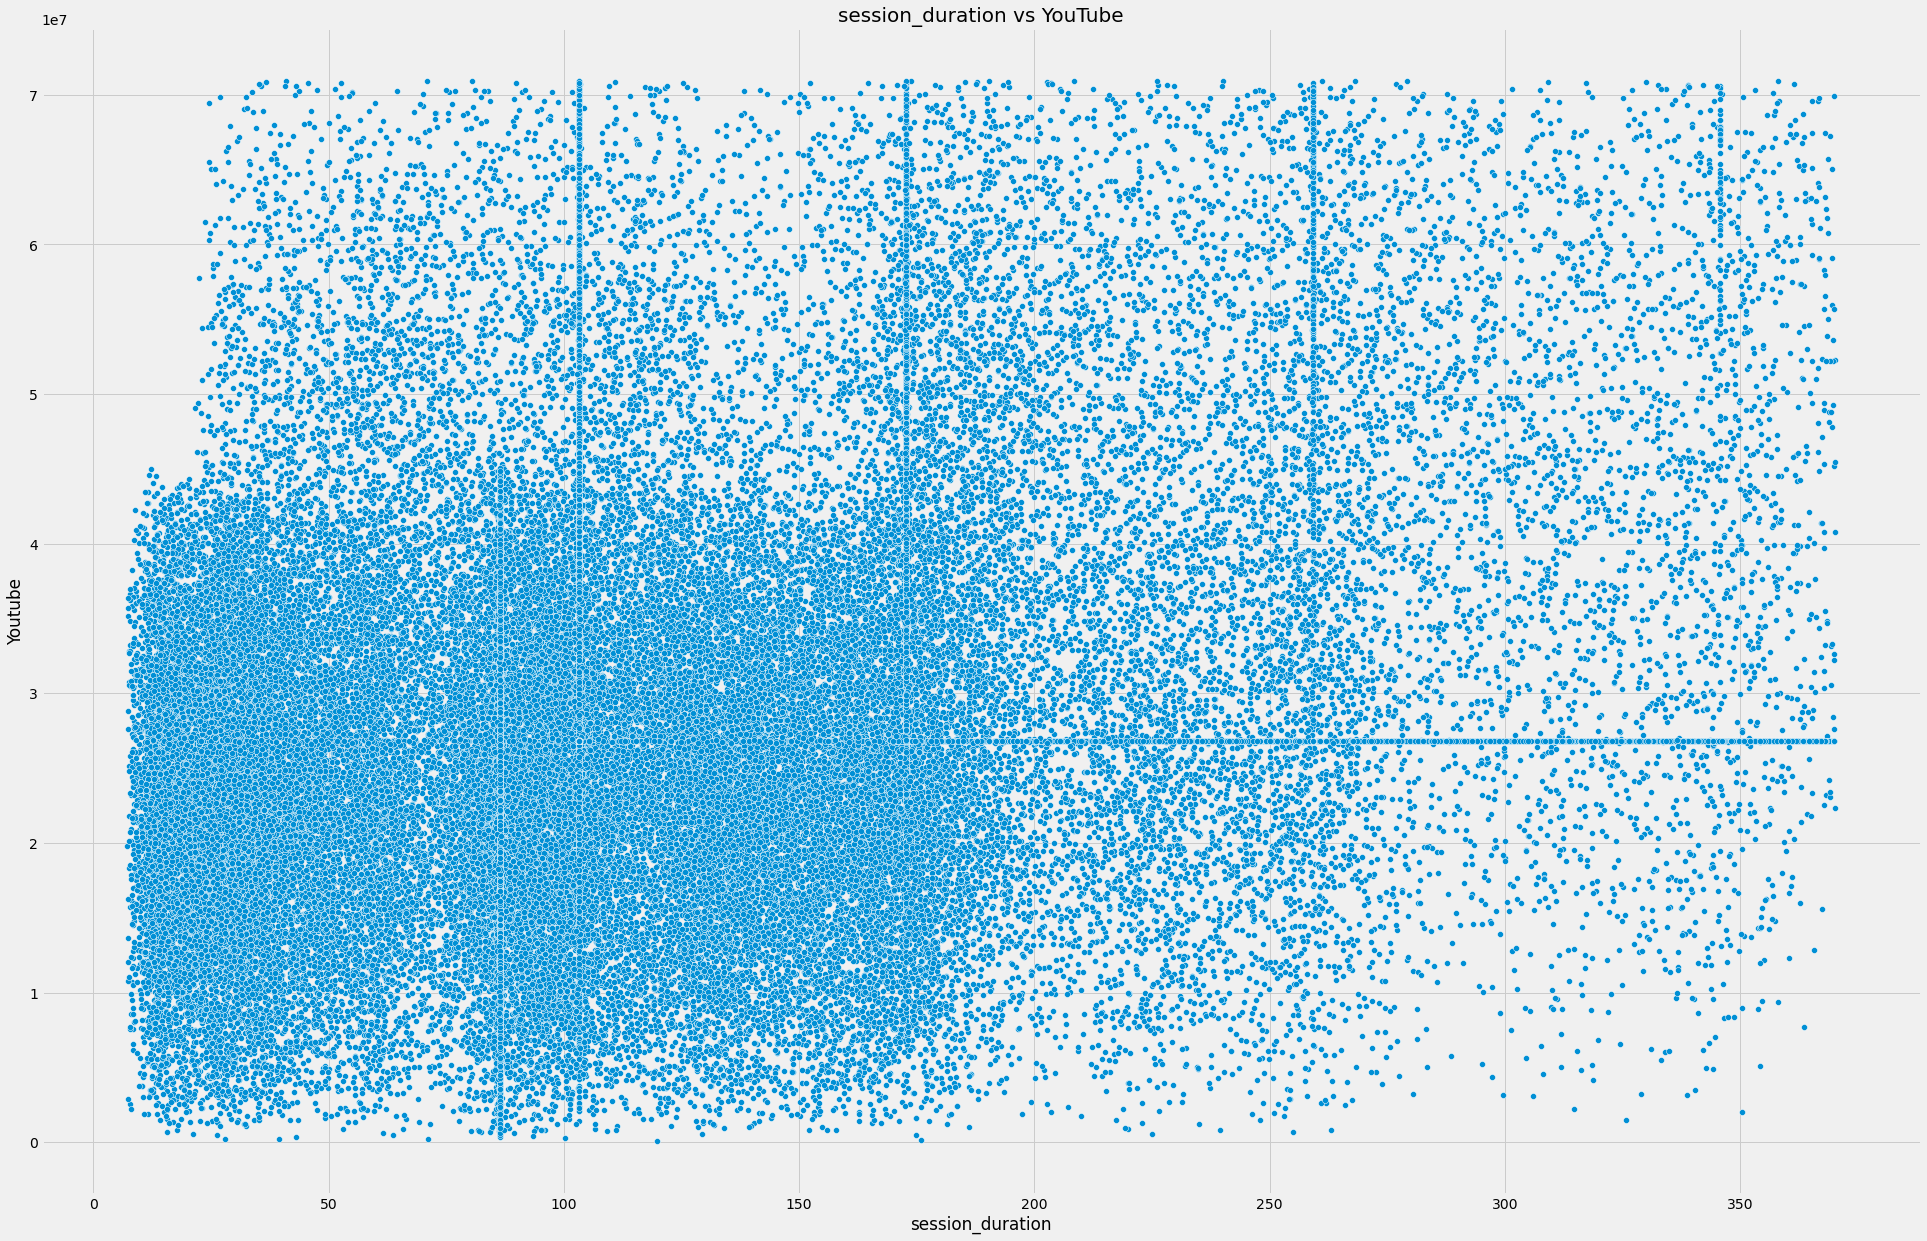

In [71]:
mult_plot.plot_scatter(agg_user_data_overview.sample(80000), x_col="session_duration", y_col="Youtube", title="session_duration vs YouTube")


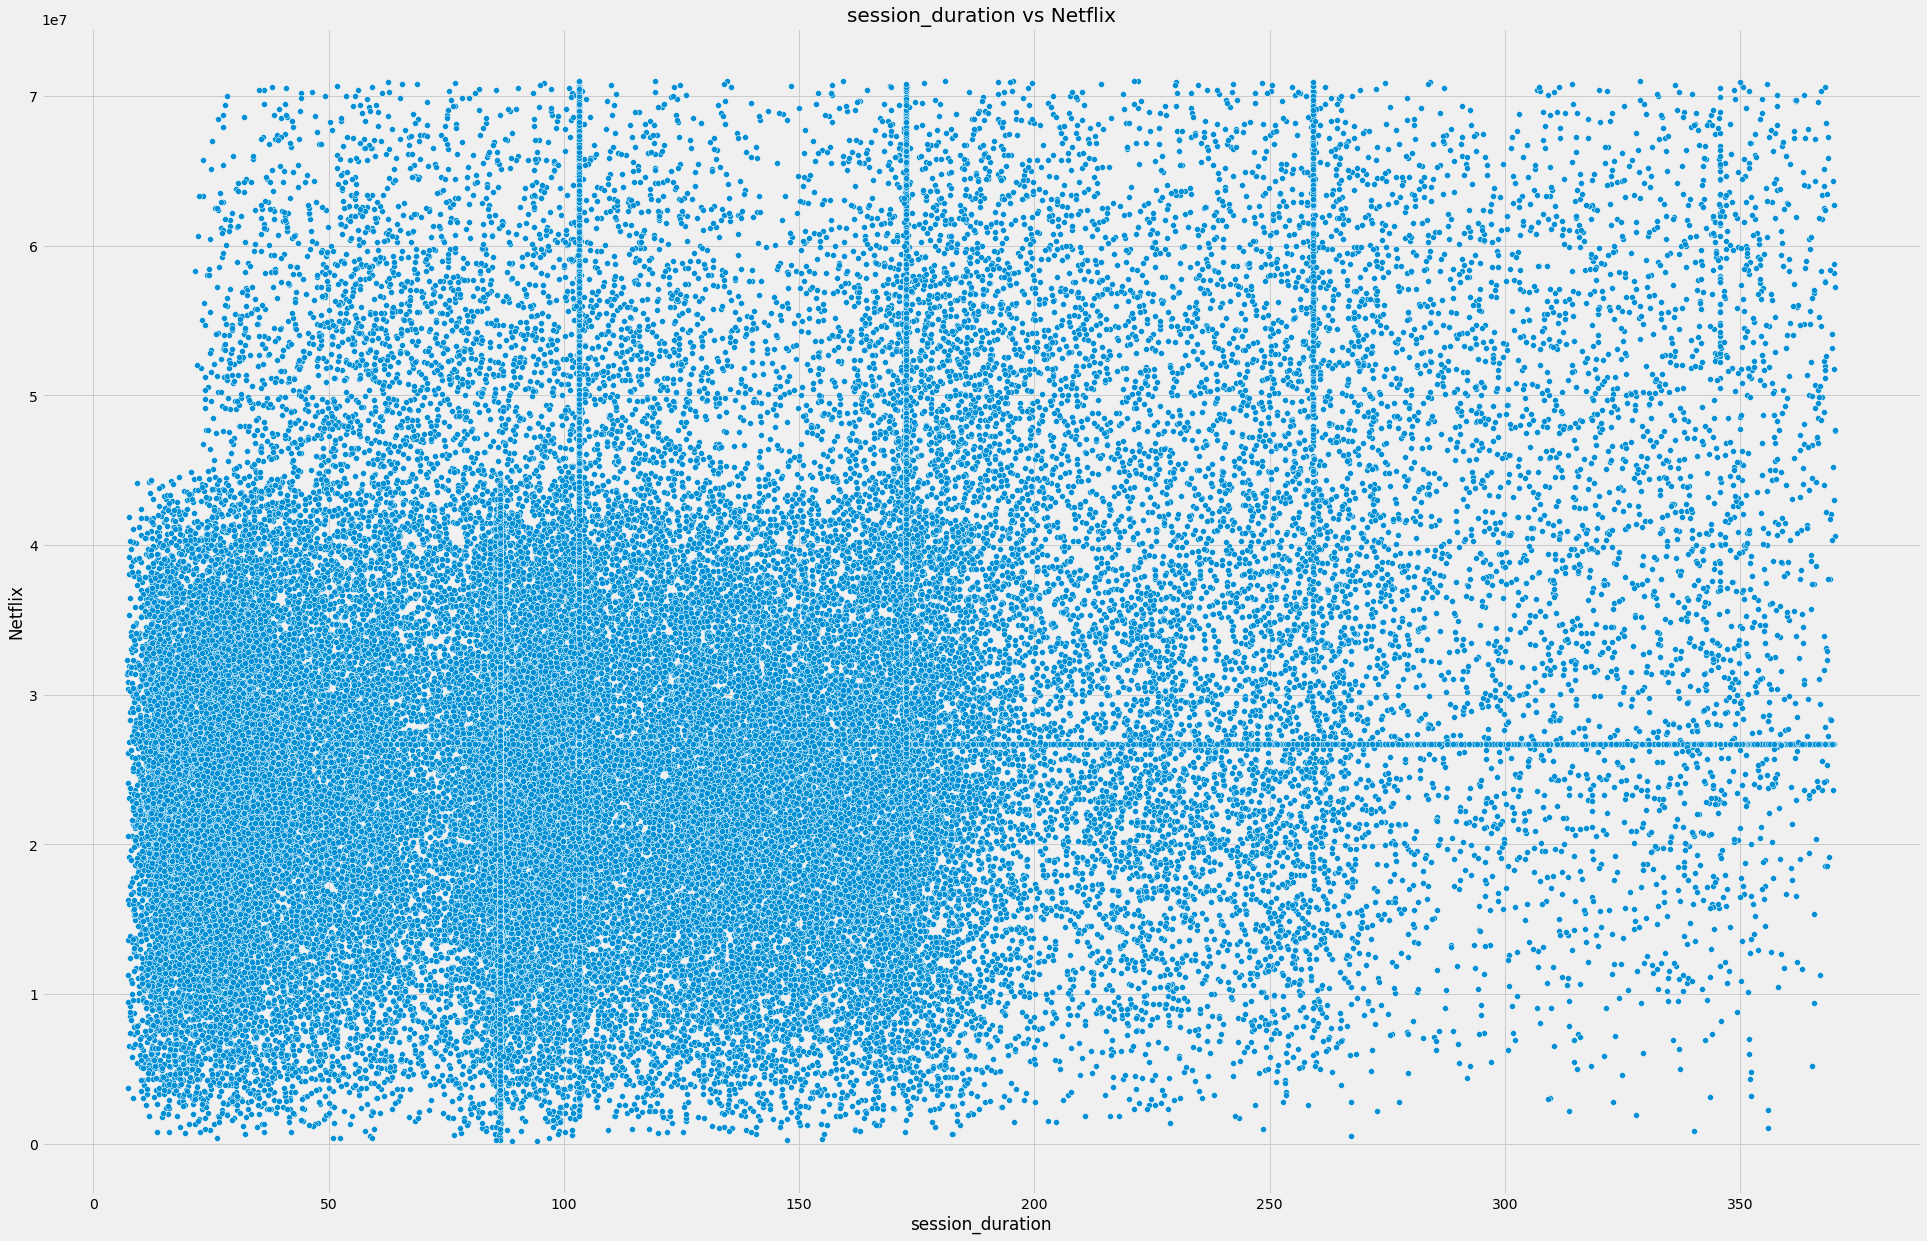

In [72]:
mult_plot.plot_scatter(agg_user_data_overview.sample(80000), x_col="session_duration", y_col="Netflix", title="session_duration vs Netflix")


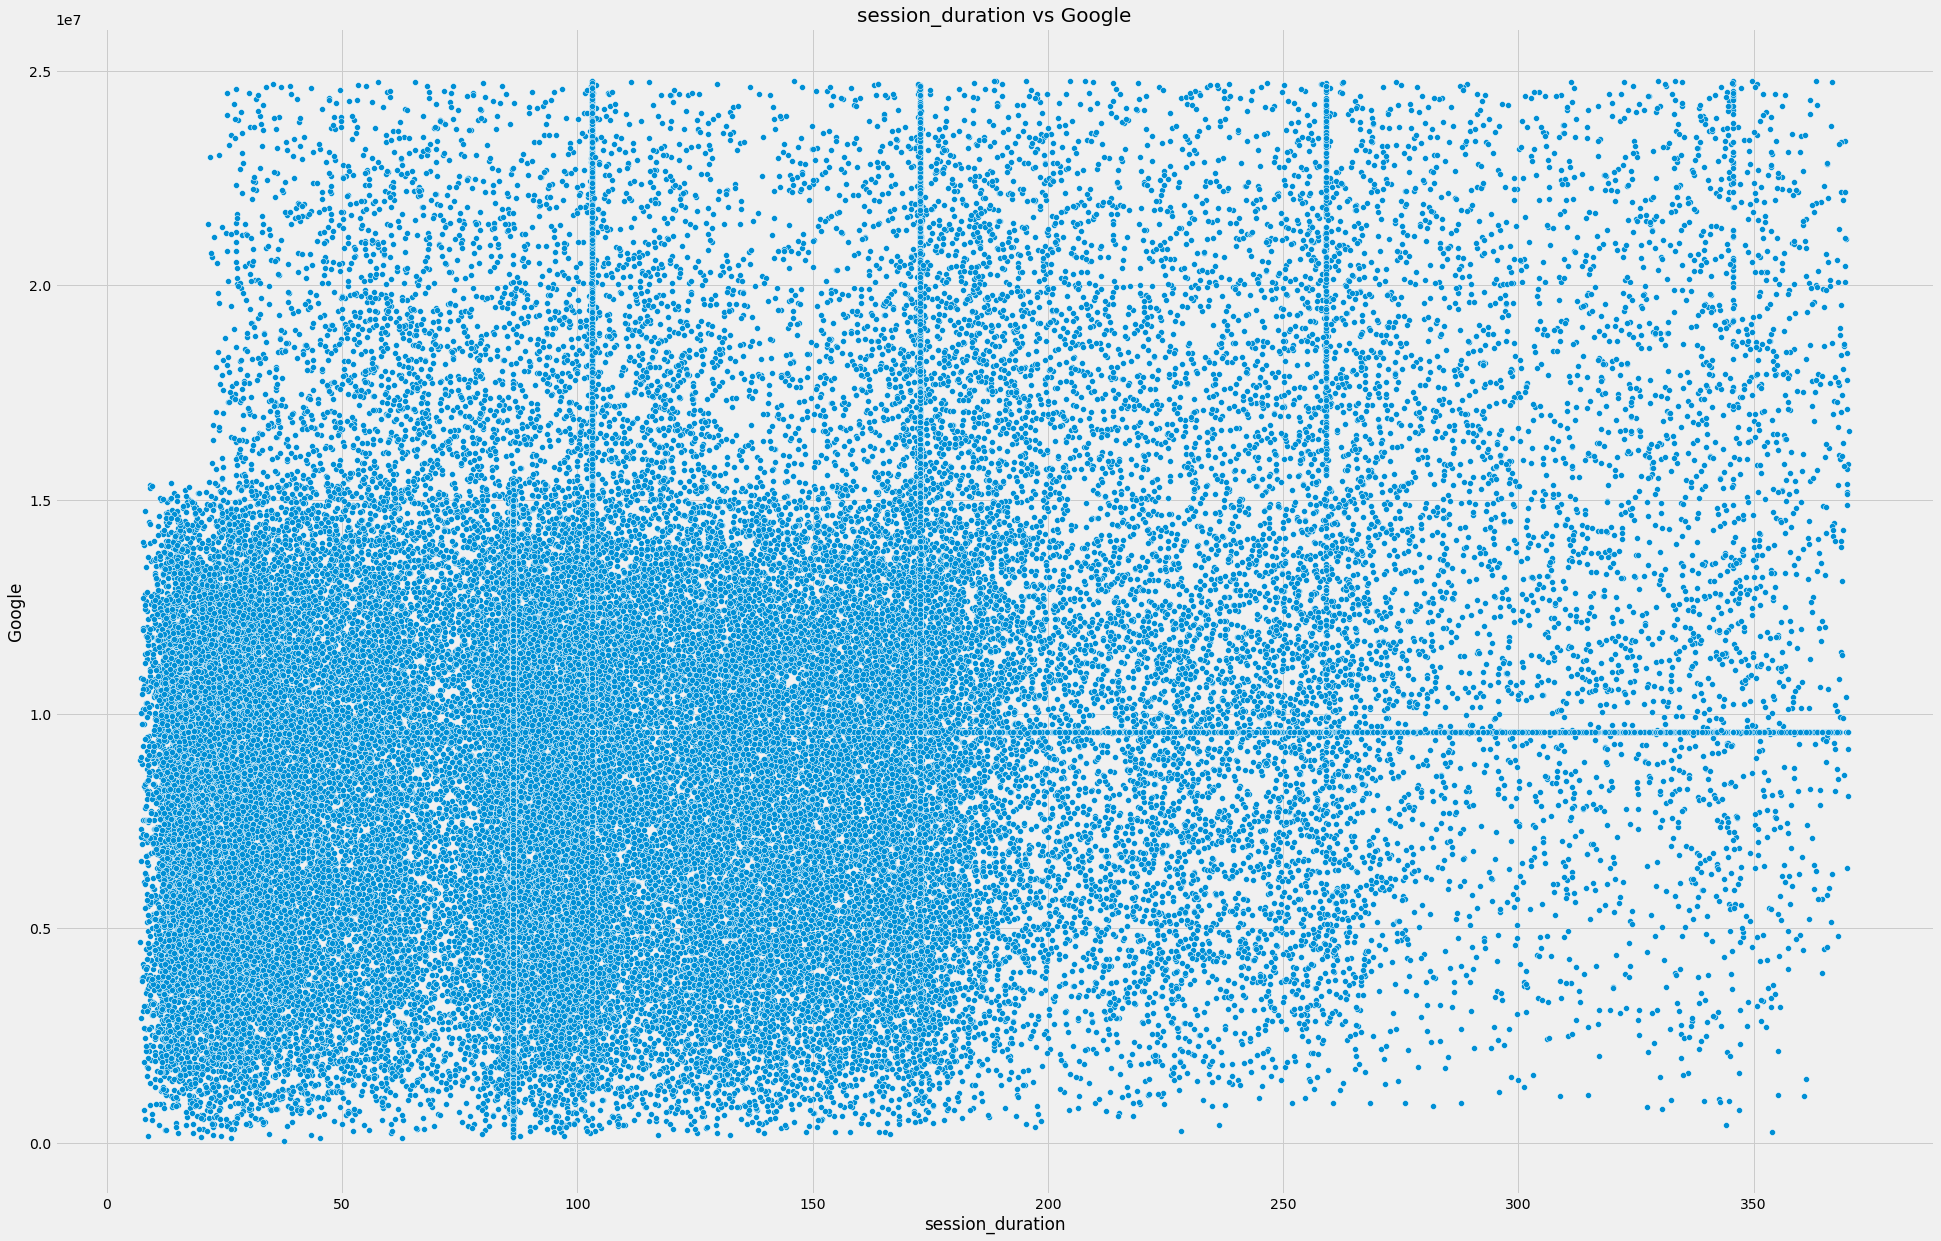

In [73]:
mult_plot.plot_scatter(agg_user_data_overview.sample(80000), x_col="session_duration", y_col="Google", title="session_duration vs Google")


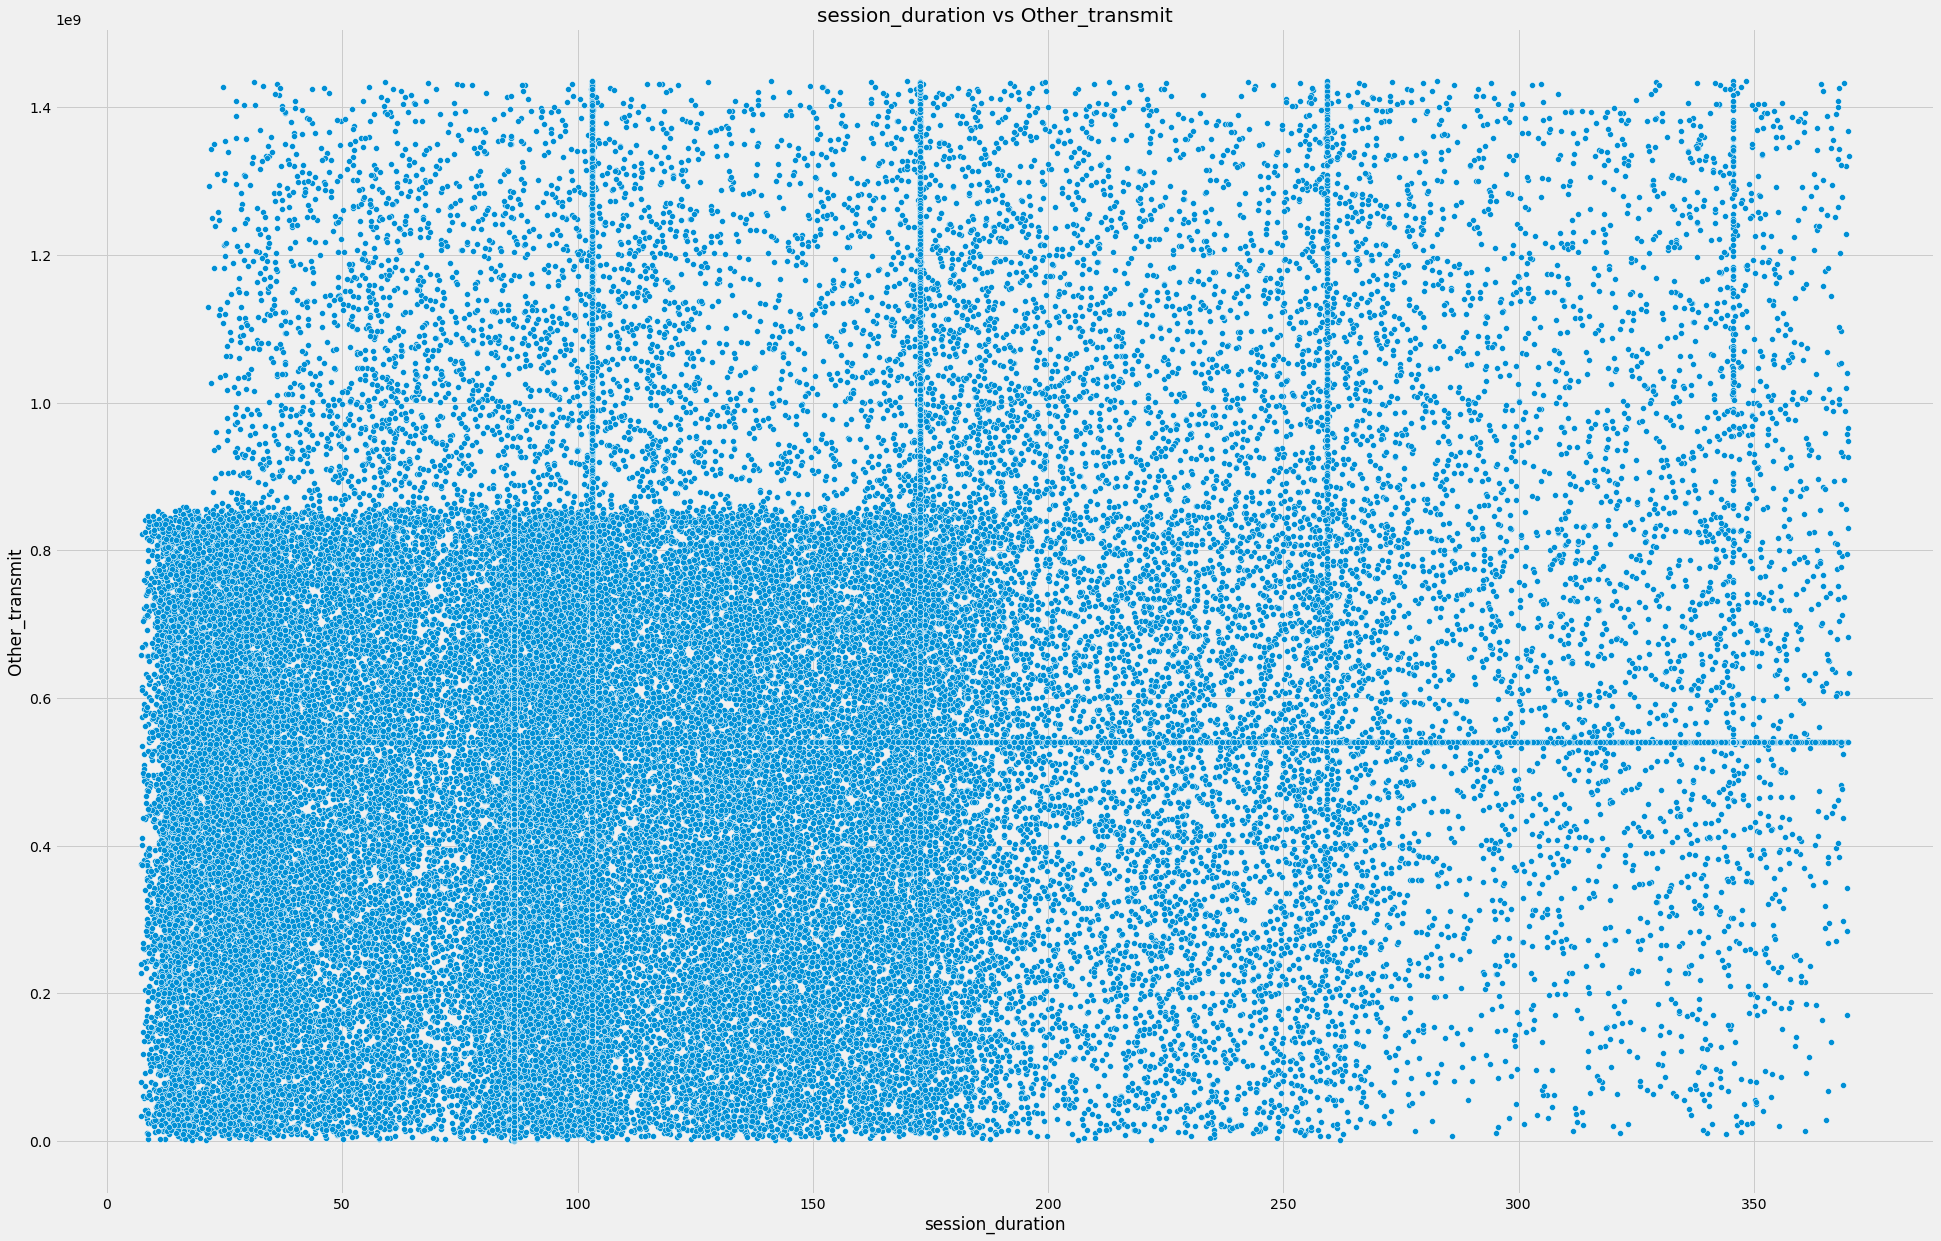

In [74]:
mult_plot.plot_scatter(agg_user_data_overview.sample(80000), x_col="session_duration", y_col="Other_transmit", title="session_duration vs Other_transmit")


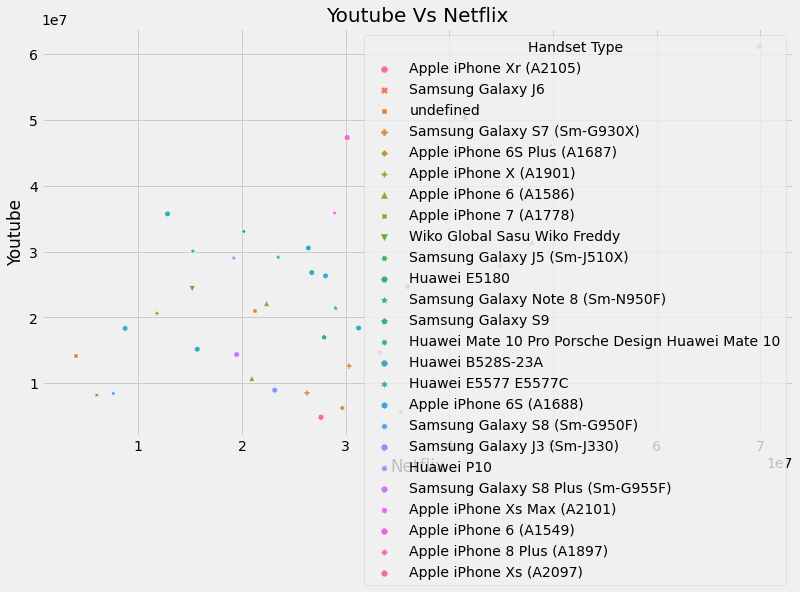

In [75]:
mult_plot.plot_scattera(agg_user_data_overview.sample(40), x_col="Netflix", y_col="Youtube", hu="Handset Type", styl="Handset Type",title="Youtube Vs Netflix")

<Figure size 576x432 with 0 Axes>

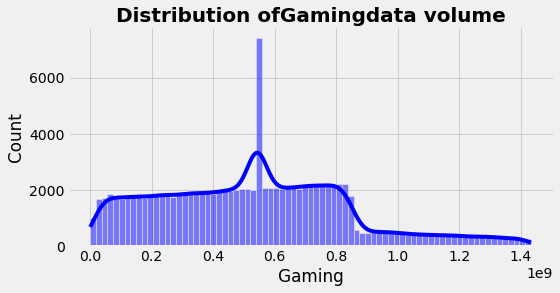

<Figure size 576x432 with 0 Axes>

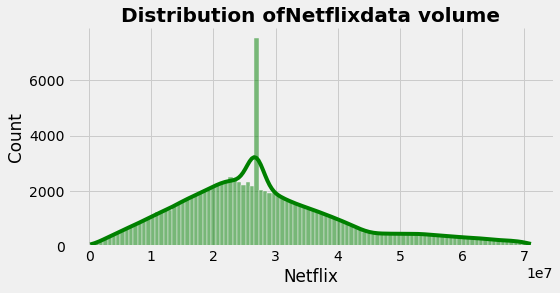

<Figure size 576x432 with 0 Axes>

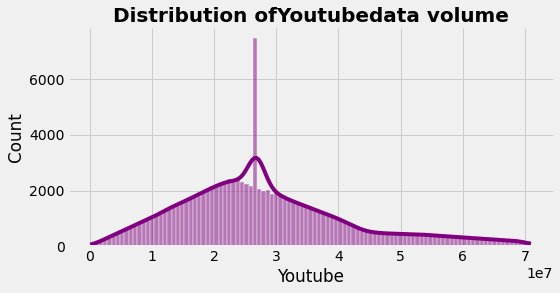

<Figure size 576x432 with 0 Axes>

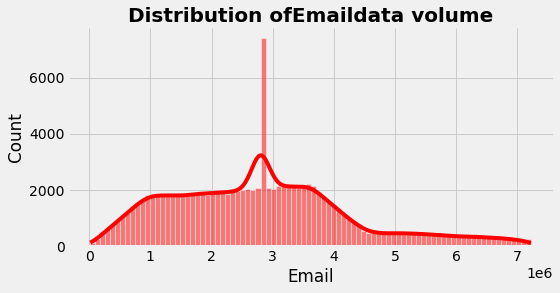

<Figure size 576x432 with 0 Axes>

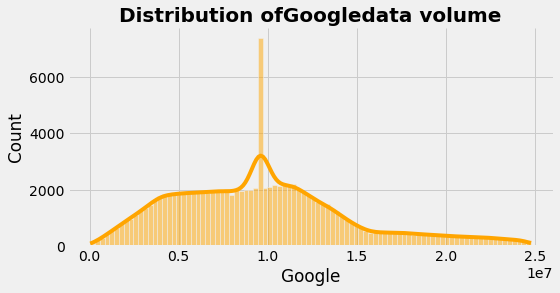

<Figure size 576x432 with 0 Axes>

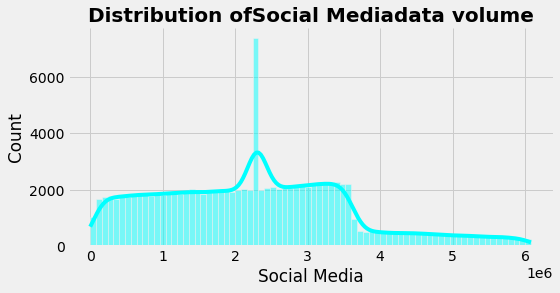

In [76]:
summery.show_col_distribution(agg_user_data_overview, ['Gaming','Netflix','Youtube','Email','Google','Social Media'], ['blue','green','purple','red','orange','cyan'])

In [77]:
# Creating a correlation matrix for the main columns to the analysis

correlated_columns = ['Total_transmit','Other_transmit','Gaming','Netflix','Youtube','Email','Google','Social Media']
sample_data_for_correlation = agg_user_data_overview[correlated_columns]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
corr = sample_data_for_correlation.corr()
corr

Total_transmit  Other_transmit  Gaming  Netflix  Youtube  \
Total_transmit           1.000           0.315   0.974    0.405    0.406   
Other_transmit           0.315           1.000   0.284    0.346    0.351   
Gaming                   0.974           0.284   1.000    0.348    0.348   
Netflix                  0.405           0.346   0.348    1.000    0.439   
Youtube                  0.406           0.351   0.348    0.439    1.000   
Email                    0.357           0.323   0.319    0.402    0.398   
Google                   0.375           0.335   0.331    0.415    0.414   
Social Media             0.322           0.291   0.288    0.354    0.354   

                Email  Google  Social Media  
Total_transmit  0.357   0.375         0.322  
Other_transmit  0.323   0.335         0.291  
Gaming          0.319   0.331         0.288  
Netflix         0.402   0.415         0.354  
Youtube         0.398   0.414         0.354  
Email           1.000   0.383         0.331  
Google          0.383   1.000         0.337  
Social Media    0.331   0.337         1.000

<AxesSubplot:>

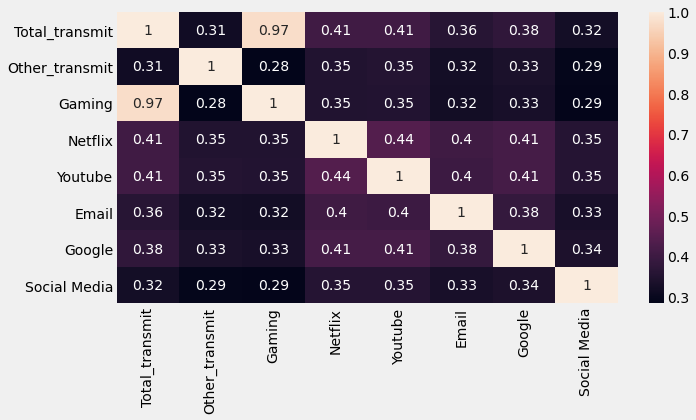

In [78]:
# Creating a correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot = True)

# Observation

In [79]:
# save file in the data directory
save_data_path = os.path.join(parent_dir,"data","user_overview_clean_data.csv") 
agg_user_data_overview.to_csv(save_data_path, index=False)

## Variable Transformation 

In [80]:
# session duration is the traget variable for the bussiness holder 
#change session duration to catagorical decile value 
agg_udo=summery.top_decile(agg_user_data_overview, {'Total_transmit':sum},[5,9])

In [81]:
agg_udo_df=agg_udo['Decile'].value_counts()[:10]